# Introduction to Machine and Deep Learning

## Overview

This notebook comprises a quick, non-exhaustive introduction to fundamental concepts in both machine and deep learning. We aim to familiarize you with these concepts in the hopes that you will build upon them to further your own understanding and capabilities in machine and deep learning.

### What's Covered
Key concepts covered in this tutorial include:
* Regression
* Classification
* Loss Functions
* Validation & Overfitting 
* Hyperparameter tuning
* Gradient Descent & Optimization
* Neural Networks

### What's Not
We will use a variety of different python libraries in this tutorial, including specific frameworks for data processing and machine and deep learning. The syntax, functionality, and APIs behind these frameworks is not our focus for this introduction. However, we encourage you to learn more about them, as they are essential components of the ML practitioner's toolkit.

These libraries include:
* [numpy](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)
* [pandas](https://pandas.pydata.org/pandas-docs/stable/)
* [matplotlib](https://matplotlib.org/)
* [scikit-learn](https://scikit-learn.org/stable/)
* [tensorflow](https://www.tensorflow.org/)
* [keras](https://keras.io/)

### What's Expected

This tutorial will assume you have some experience with numpy and data structures.

## Contents

This tutorial consists of three parts:

* Machine Learning
 * Part 1: Linear Regression
 * Part 2: Decision Tree Classification
* Deep Learning 
 * Multi-Layer Perceptron (MLP)

## Jupyter Notebook

This tutorial is executed in a specific IDE call a **Jupyter Notebook**. If you know what a Jupyter Notebook is, please **skip to the next section**.

A Jupyter Notebook is "[an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text](https://jupyter.org/). It's an IDE that is commonly used by Data Scientists that simplifies exploratory data analysis (EDA) and experimentation. 

The notebook application allows you to execute **code cells** interactively. As an example, execute the code cell below by selecting the cell and clicking the **Run** button above (or using the appropriate hot key).

In [1]:
print("Hello world!")

Hello world!


The notebook executes the code cell, and prints outputs beneath the code cell.

The notebook sits on top of a python kernel that maintains state throughout the lifetime of the notebook. When we execute the code block below, we assign 5 and 6 to variables <tt>a</tt> and <tt>b</tt> respectively

In [2]:
a = 5
b = 6
a+b

11

Now, when we run the next cell block repeatedly, we get incrementally higher values of <tt>a</tt> because the kernel is keeping track of the value of <tt>a</tt> as if you were running this in any other environment.

In [3]:
a += 1
a

6

It's important when working through the tutorial notebook to remember that you need to execute blocks in order as if they were in a script.

The numbers in brackets next to each code cell indicate the relative order of execution; while a block is executing, you'll see an asterisk **\*** in the brackets.

As an example, execute the next cell. This will kick off an infinite loop, but you can interrupt the kernel at anytime by pressing the **stop** button above.

In [4]:
while True:
    continue

KeyboardInterrupt: 

# Imports

In [ ]:
!conda install python-graphviz -y

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_iris, load_breast_cancer
import graphviz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
# %matplotlib inline

from IPython.display import HTML

# Machine Learning

Before we start looking at machine and deep learning, it's important to understand the relationship between each and AI as a whole. Artifical intelligence, machine learning, and deep learning overlap, and subset each other from right to left. Let's broadly define each here:
* **Artificial Intelligence**: Techniques and methods used to enable computer systems to perform complex tasks that are perceivable as *intelligent*.
* **Machine Learning**: Algorithms and statistical models that accomplish the above via modeling and inference techniques, as opposed to *rule-based* systems
* **Deep Learning**: A class of machine learning algorithms called *neural networks* that are state-of-the-art at many tasks such as computer-vision and natural language processing (NLP) 

<img src="https://user-images.githubusercontent.com/36491325/51944421-de39a400-23d0-11e9-8fde-28a2f75b2a7f.png" width="400" height="400" />

Simply put, machine learning models perform intelligent tasks and provide intelligent insights by *learning* them from **data**, instead of relying on hand-crafted rules and logic. Deep learning concerns a particular class of models called neural networks. Managing and tuning this learning process is a core part of what it means to practice machine learning.

There are many different machine learning models and different tasks. When those tasks are to make predictions, machine learning models typically learn how to do this by looking at examples; these are **observations** with corresponding **labels**. This method of learning is called **supervised learning**, and is our focus.

In this section of this tutorial, we will focus on two different machine learning **algorithms/models** for two different machine learning **tasks**:
* **linear models** for **regression**
* **decision trees** for **classification**


## Part 1: Linear Regression

Using linear models for regression, or simply linear regression, has a long history in statistical analysis and is so well known that many don't realize it is in fact one of the simplest examples of machine learning. 

In **linear regression**, our model describes a linear relationship between a **label**, which we call a **target**, and a set of **observations**, which we call features. Recall the equation of a line: 

$y=mx + b$

The **parameters** $m$ and $b$ describe the relationship between the **feature** $x$ and the **target** $y$. 

Let's create a function for this linear model:

In [2]:
def create_linear_model(params={"m":1.0, "b":0.0}):
    return lambda x: params['m']*x + params['b']

To understand how the ML process works, we're going to work backwards from a working model.

### Linear Model with Known Parameters

Let's say we want to create a linear model to describe the relationship between the age of adolescent boys and their height. **Assume** we know that the average height of boys increases by 2 inches for each year between 11 and 18, and the average height at age 11 is 55 inches.

If feature $x$ represents years after 11, and $y$ represents height in inches, then we can say that parameter $m$ is 0.5 and the parameter $b$ is 55.

In [3]:
boy_height_params = {"m":2.0, "b":55.0}
boy_height_linear_model = create_linear_model(boy_height_params)

Now we can use our model to make a prediction on an input feature. This process of making predictions on new values is called **inference**.

**Try predicting for different values of <tt>x</tt> between 0 and 7:**

In [4]:
x = 2
y = boy_height_linear_model(x)
print(f"Linear model predicted a height of {y // 12} ft, {y % 12} inches for a {x+11}-year-old boy")

Linear model predicted a height of 4.0 ft, 11.0 inches for a 13-year-old boy


Let's plot this line over a range of values:

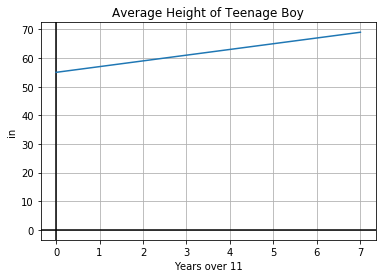

In [5]:
fig, ax = plt.subplots()
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel("Years over 11")
ax.set_ylabel("in")
ax.set_title("Average Height of Teenage Boy")
ax.plot(list(range(8)), [boy_height_linear_model(i) for i in range(8)])

Great, we have a working linear model that describes the relationship between teenage boys age and their average height. 

### Linear Model with Unknown Parameters

We got the model in the previous section because we were able to figure out what the **parameters** $m$ and $b$ are, based on an **assumption** we made about the relationship between the feature $x$ and target $y$. In reality, we never know what the right parameters are, we have to **learn** them by looking at historical data or observations.

Let's look at an example of what real data would look like by loading a sample diabetes dataset from the sci-kit learn library:

In [6]:
diabetes_dataset = load_diabetes()

Let's look at the description of the dataset features (called attributes) and target:

In [7]:
print(diabetes_dataset['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

We want to create a linear model to describe the relationship between body mass index (our feature $x$) and diabetes progression (the target $y$). But this time, we have no idea what the parameters should be.

Let's look at the data:

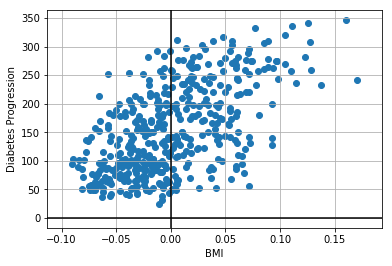

In [8]:
X = diabetes_dataset['data'][:,np.newaxis,2]
y = diabetes_dataset['target'][:,np.newaxis]

fig, ax = plt.subplots()
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

#### Picking good parameters

Given that $m$ is the slope of the linear model and $b$ is the y-intercept, can you guess the parameters that would best fit the average diabetes progession? 

**Try by changing the parameter dictionary below:**

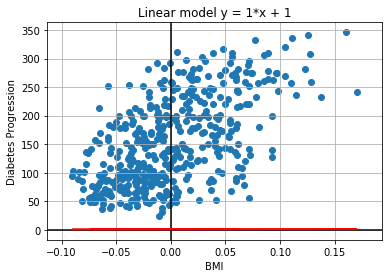

In [10]:
# change m and b values below to visualize your line guess
guess_params = {"m": INSERT_M, "b": INSERT_B}


guess_line_function = create_linear_model(guess_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([guess_line_function(x) for x in X])
ax.set_title(f"Linear model y = {guess_params['m']}*x + {guess_params['b']}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.plot(X, preds, c='r')

We need to qualify which parameters are good guesses, and which are bad. To do this, we have to use a **loss function**, a function that compares how far off predicted targets are from the real targets. Good parameters should give predictions that have a small loss, while bad parameters should give a large loss.

For regression, we often use the **mean squared error**, or **mse** as a loss function. This is the average squared difference between predictions and labels:

In [11]:
def mse(preds, y):
    return np.mean((preds - y)**2)

**Now that we have a way of measuring how good our model is performing, let's try again to find the best parameters. See if you can find them.**

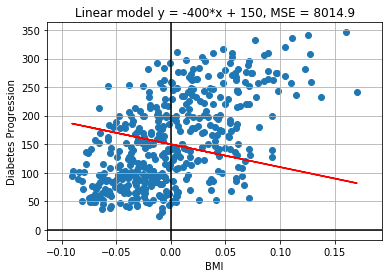

In [12]:
# change m and b values below to visualize your guess and get a loss value
guess_params = {"m":INSERT_M, "b":INSERT_B}


guess_line_function = create_linear_model(guess_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([guess_line_function(x) for x in X])
ax.set_title(f"Linear model y = {guess_params['m']}*x + {guess_params['b']}, MSE = {np.round(mse(preds, y), decimals=1)}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.plot(X, preds, c='r')

#### Learning the best parameters

Rather than guessing, machine learning let's us *learn* the correct parameters or algorithms for our models, given labeled data. Machine learning models find the parameters or algorithm that minimize the loss function between the data labels, and the predicted values. This process is called **training** or **fitting**.

We can use the <tt>LinearRegression</tt> model in scikit-learn to fit a linear regression model to our data and find the best param

In [13]:
lr_model = LinearRegression()
lr_model.fit(X, y)
print(f"Best parameters: m = {lr_model.coef_[0,0]}, b = {lr_model.intercept_[0]}")

Best parameters: m = 949.4352603839491, b = 152.1334841628967


Plot the best parameters:

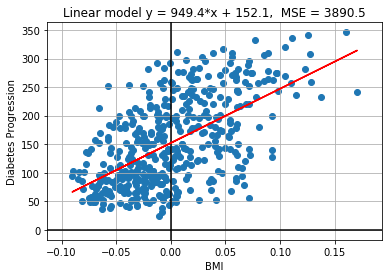

In [14]:
best_params = {"m":lr_model.coef_[0,0], "b":lr_model.intercept_[0]}

best_line_function = create_linear_model(best_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
preds = np.array([best_line_function(x) for x in X])
ax.set_title(f"Linear model y = {np.round(best_params['m'], 1)}*x + {np.round(best_params['b'], 1)},\
  MSE = {np.round(mse(preds, y), decimals=1)}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.plot(X, preds, c='r')

How do we know these are the best parameters?

If we test out a grid of parameters, and calculate their corresponding mse's, we can plot the loss surface as a function of parameters m and b:

(You can grab the plot below and move it)

<IPython.core.display.Javascript object>


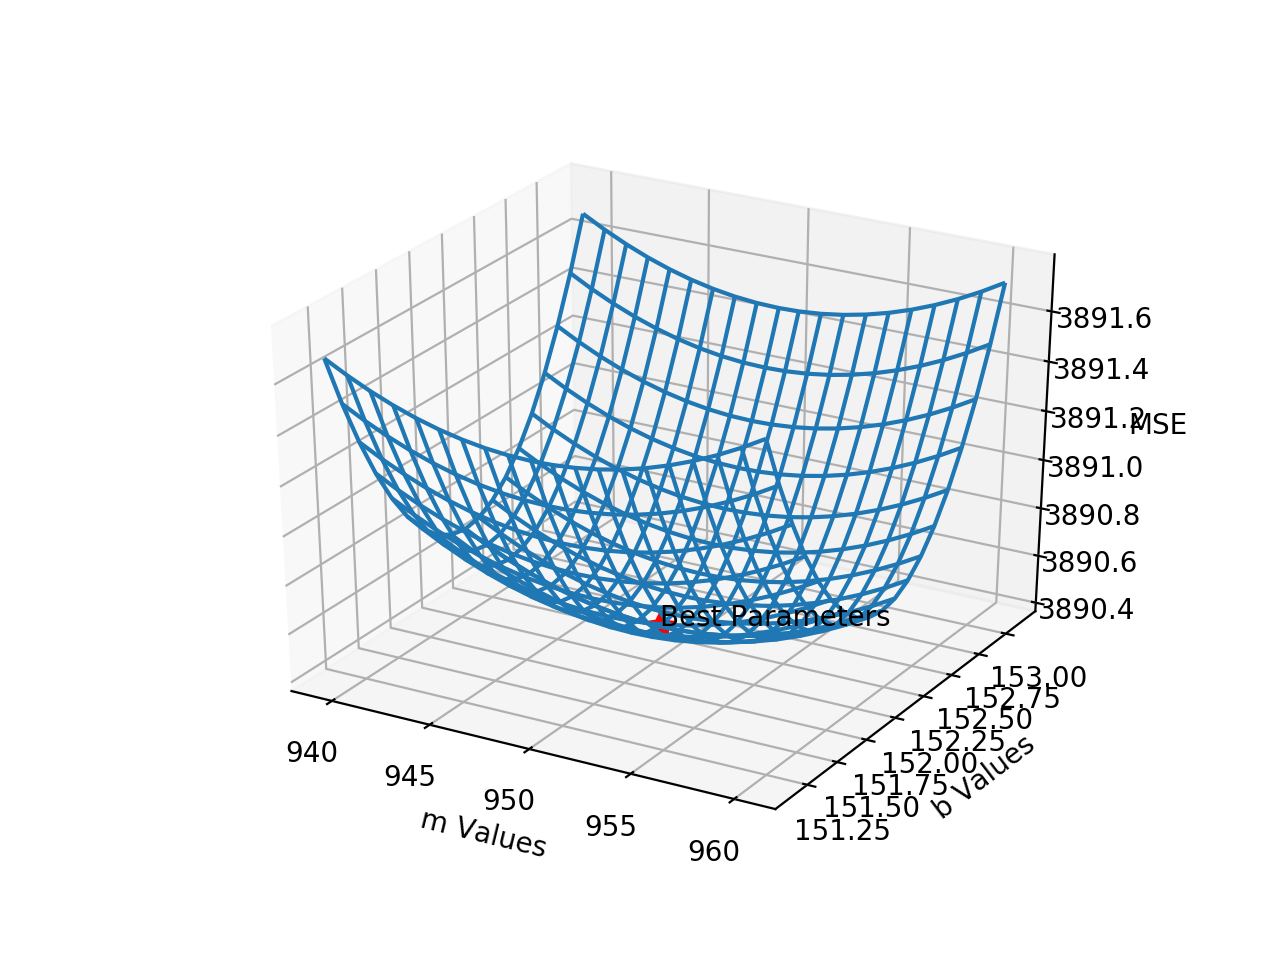

In [15]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m_range = np.concatenate([np.linspace(best_params['m'] - 10, best_params['m'], num=10),
                          np.linspace(best_params['m'] + 1, best_params['m'] + 11, num=10)])

b_range = np.concatenate([np.linspace(best_params['b'] - 1, best_params['b'], num=10),
                          np.linspace(best_params['b'], best_params['b'] + 1, num=10)])

m_grid, b_grid = np.meshgrid(m_range, b_range)
zs = []
for m,b in zip(np.ravel(m_grid), np.ravel(b_grid)):
    linear_model = create_linear_model({"m":m, "b":b})
    tmp_preds = np.array([linear_model(x) for x in X])
    zs.append(mse(tmp_preds, y))
zs = np.array(zs)
Z = zs.reshape(m_grid.shape)

ax.plot_wireframe(m_grid, b_grid, Z)
ax.scatter(best_params['m'], best_params['b'], mse(preds, y), s=100, marker=(5,1), c='r')
ax.text(best_params['m'], best_params['b'], mse(preds, y), "Best Parameters", zorder=1)

ax.set_xlabel('m Values')
ax.set_ylabel('b Values')
ax.set_zlabel('MSE')

plt.show()

In linear regression, the loss function is convex, and the best parameters are the global minima seen above. When scikit-learns's <tt>LinearRegression</tt> model trains on <tt>X</tt>, it finds those parameters using a method called Ordinary Least Squares, or OLS.

As we'll see, finding the best parameters or algorithm for a machine learning model is not always as straight forward.

## Part 2: Decision Tree Classification

Now that we understand some of the concepts behind ML, we can move on to a more advanced use case. Let's define some of the core attributes:
* **Task**: classifying features
* **Model**: Decision Tree
* **Loss function**: Gini Impurity

Let's look at our data set:

In [16]:
iris_dataset = load_iris()
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

We're going to use a decision tree to classify plant features into one of three iris plant types:
* Features:
 * Sepal Length
 * Sepal Width
 * Petal Length
 * Petal Width
* Target
 * Iris Plant Type
 
A decision tree is a tree-based model that uses splitting rules to predict a value for a given set of features. Like the parameters in a linear regression model, these splitting rules are learned by training on a labeled data set, and are chosen to optimize a loss function or metric (called criterion for scikit-learn's <tt>DecisionTreeClassifier</tt>).

In this case, we use a metric called the "gini impurity". Put simply, it's a measurement of the likelihood of incorrect classification. The decision tree algorithm iteratively chooses values and features to split on in order to minimize this value.

Let's train a decision tree classifier on this dataset.

In [17]:
X, y = iris_dataset['data'], iris_dataset['target'][:,np.newaxis]

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(X, y)

Let's use the built-in <tt>score</tt> method to calculate the accuracy of our trained model:

In [18]:
print(f"Accuracy of trained decision tree: {100*tree_classifier.score(X, y)}%")

Accuracy of trained decision tree: 100.0%


Wow, that's very good. It's actually **too good**... more on that soon.

But first, now that we've trained the classifier, we can plot the decision tree and the splitting rules it learned for the data set:

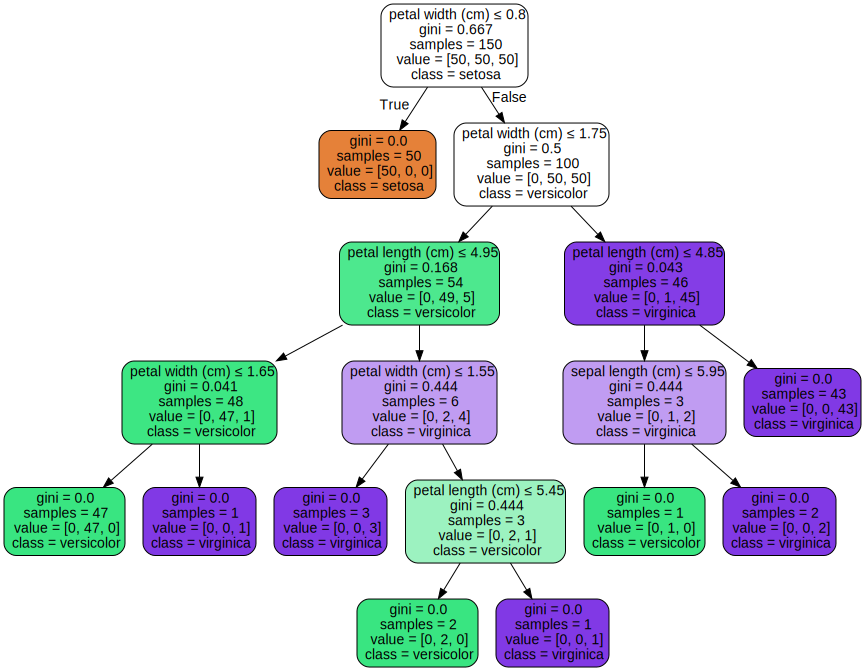

In [19]:
dot_data = export_graphviz(tree_classifier, out_file=None, 
                     feature_names=iris_dataset['feature_names'],  
                     class_names=iris_dataset['target_names'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can see that the tree has, at maximum, 5 rules to get to a prediction. This is called the **max depth**.

### Overfitting

Recall that our model achieved 100% accuracy on our training dataset. That sounds like a good thing, but it's actually not. When we train predictive models, we want them to be able to perform well on **unseen data**; that is, we want the rules the decision tree learns to **generalize** well to data it's never seen before. Our 100% accuracy means the model learned rules overly specific to the training set, but likely won't hold up to new data points. This phenomena is called **overfitting**.

To visualize this, let's retrain the model using only two features so we can easily plot the decision boundaries:

<IPython.core.display.Javascript object>


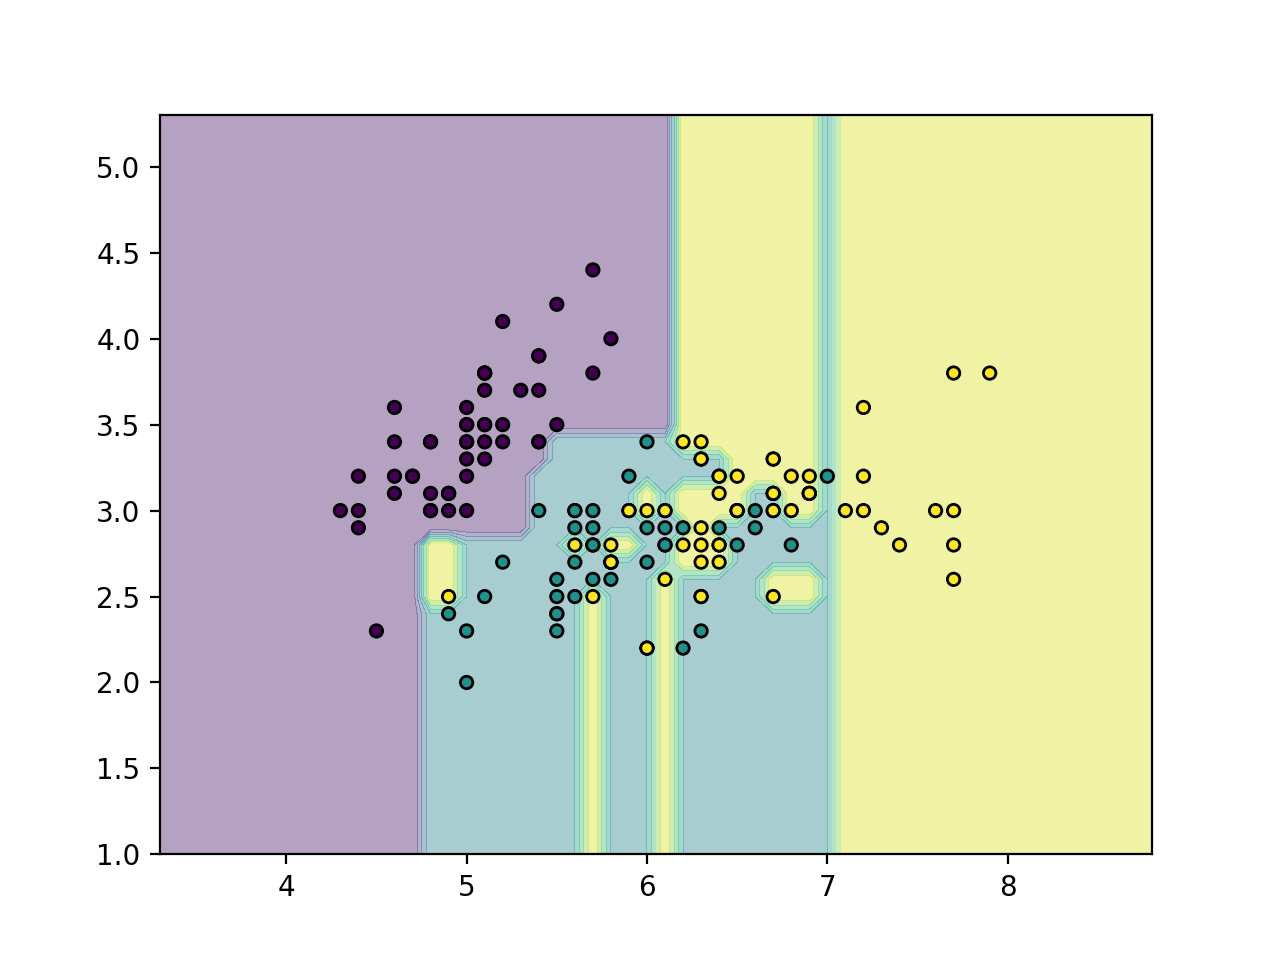

In [20]:
# visualization code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html 
sample_X = iris_dataset.data[:, [0, 1]]
sample_y = iris_dataset.target

x_min, x_max = sample_X[:, 0].min() - 1, sample_X[:, 0].max() + 1
y_min, y_max = sample_X[:, 1].min() - 1, sample_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots()

clf = DecisionTreeClassifier()
clf.fit(sample_X, sample_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(sample_X[:, 0], sample_X[:, 1], c=sample_y,
                              s=20, edgecolor='k')

plt.show()

With a decision tree classifier, our splitting rules divide the space into regions corresponding to each class. As you can see, the region is chopped up in such a way to ensure 100% accuracy, but it doesn't make much sense at all.

Here's an example of a better decision tree classifier, this time with parameter <tt>max_depth=3</tt>:

<IPython.core.display.Javascript object>


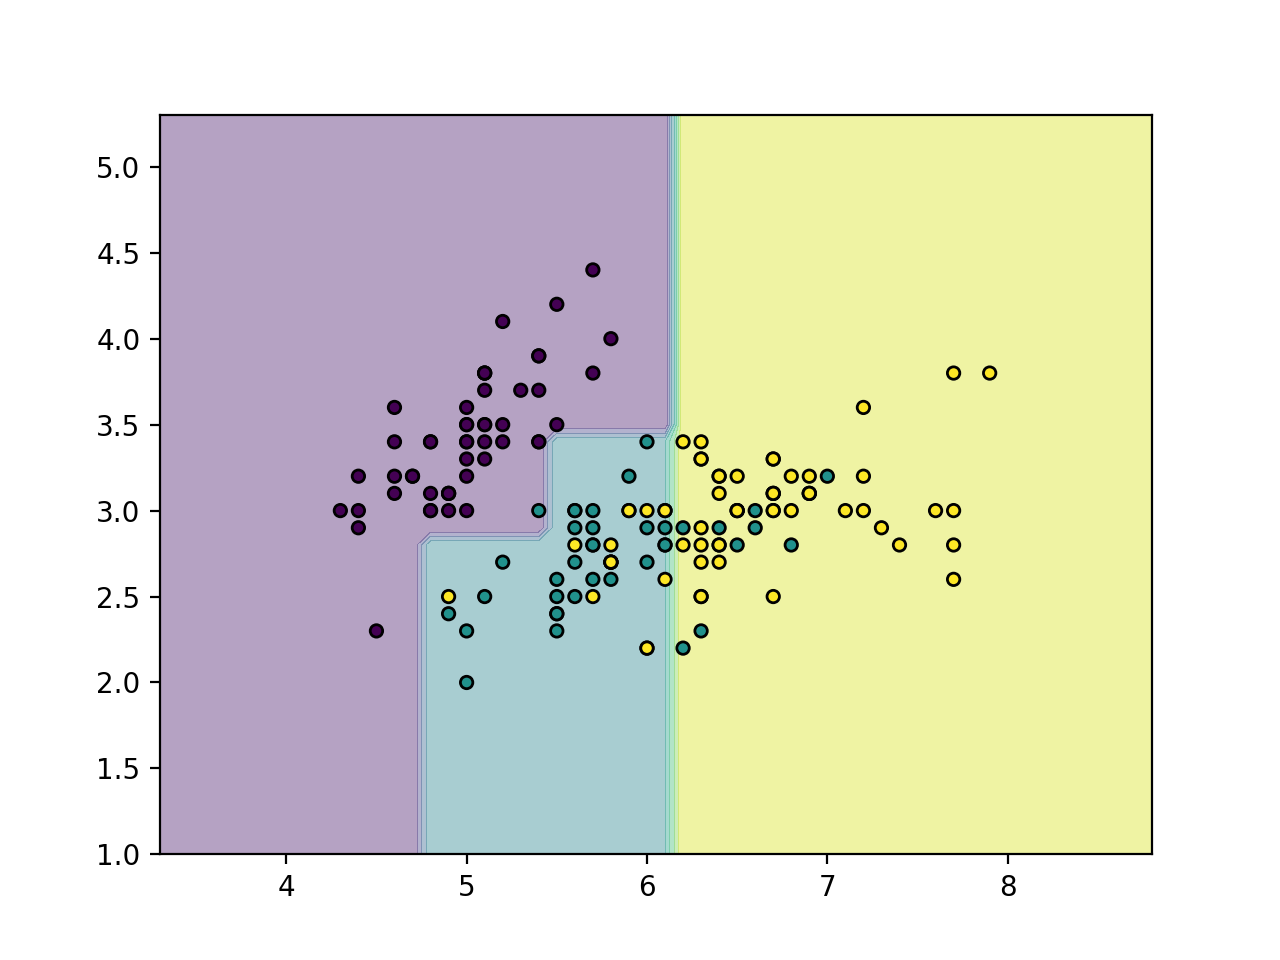

In [28]:
# visualization code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html 
sample_X = iris_dataset.data[:, [0, 1]]
sample_y = iris_dataset.target

x_min, x_max = sample_X[:, 0].min() - 1, sample_X[:, 0].max() + 1
y_min, y_max = sample_X[:, 1].min() - 1, sample_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots()

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(sample_X, sample_y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(sample_X[:, 0], sample_X[:, 1], c=sample_y,
                              s=20, edgecolor='k')

plt.show()

By changing this parameter, our boundaries seem more **generic**, rather than fitting to the random noise in the data.

There are two approaches that together help overfitting:
* Validation
* Hyperparameter tuning

Let's build a classifier on a more complicated data set using these techniques.

In [21]:
breast_cancer_dataset = load_breast_cancer()
print(breast_cancer_dataset['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
X, y = breast_cancer_dataset['data'], breast_cancer_dataset['target']

### Validation

We want our model to generalize well, thus we need to measure it's performance on data **it's never seen**. There are different ways to do this, but we'll use a simple one: we're going to hold out 20% of the training data and validate the model's performance on this hold out, which we call **validation data**.

In [23]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1984)

In [24]:
tree_classifier = DecisionTreeClassifier(random_state=1984)
tree_classifier = tree_classifier.fit(train_X, train_y)

Now we can compare metrics between training data and validation.

In [25]:
print(f"Accuracy on training data: {tree_classifier.score(train_X, train_y)}.\
  Accuracy on validation data: {tree_classifier.score(val_X, val_y)}")

Accuracy on training data: 1.0.  Accuracy on validation data: 0.9298245614035088


As expected, when left to overfit the model doesn't perform as well on data it's never seen before.

### Hyperparameter Tuning

How do we prevent our model from overfitting?

When we train or fit our models, we use certain training algorithms that have their own set of rules or parameters. We call these **hyperparameters**, parameters that are not part of the model itself but change how the model is trained. The process of altering these hyperparameters to achieve the best validation performance for a model is called **hyperparameter tuning**, and it's at the core of machine learning.

Let's look at the scikit-learn <tt>DecisionTreeClassifier</tt> [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand some of the hyperparameters used in this algorithm.

There are about 13 different hyperparameters. We can see by default, <tt>max_depth</tt> and <tt>min_samples_split</tt> are <tt>None</tt> and <tt>2</tt> respectively. These default settings almost guarantee that a decision tree will overfit, because there are no limitations on how deep to let the tree grow and it won't stop until every leaf (terminal node) of the tree has exactly one value in it.

**Try changing the parameters below to find the best validation metric without overfitting. If you can, consider changing the below code to search over different parameter values. How might you determine whether a model is not overfitting?**

In [26]:
criterion=INSERT_CRITERION
max_depth=INSERT_MAX_DEPTH
min_samples_split=INSERT_MIN_SAMPLES_SPLIT
min_samples_leaf=INSERT_MIN_SAMPLES_LEAF

tree_classifier = DecisionTreeClassifier(criterion, max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         random_state=1984)
tree_classifier = tree_classifier.fit(train_X, train_y)
print(f"Accuracy on training data: {tree_classifier.score(train_X, train_y)}.\
  Accuracy on validation data: {tree_classifier.score(val_X, val_y)}")

Accuracy on training data: 0.9934065934065934.  Accuracy on validation data: 0.9649122807017544


# Deep Learning

We now know some of the core concepts that make up a machine learning problem:
* The **task**, such as classification or regression
* The **model**, such as a linear model or a decision tree
* **Loss functions and metrics** (MSE, Gini Impurity, Accuracy)
* **Validation** of models using a hold-out validation set
* **Hyperparameter tuning** (max tree depth, etc.)

Armed with this knowledge, it's time to move on to neural networks. 

## Neural Networks

Artificial Neural Networks are machine learning models inspired by the human brain, and have been incredibly successful at a wide range of applications including computer vision and natural language processing. These models are **networks** of **neurons** that activate on inputs and work together to perform complex tasks.

<figure><img src='https://user-images.githubusercontent.com/36491325/52151446-fc4d1180-2627-11e9-9ab7-7eab3af431fb.png'><figcaption>1. https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/</figcaption></figure>

The circles above are these neurons. Features are fed into the network as indicated by the **input layer**, where each neuron is an individual feature. These input neurons then **feed-forward** through the network to the **first hidden layer**. If neurons in the hidden layer are activated, they feed-forward to the next hidden layer, and so on until the **output layer**. The output neurons are typically the **targets** the model is trying to predict.

We call training neural networks **deep learning** because networks with many hidden layers are considered to be deep.

### Neurons and Networks

Let's take a closer look at neurons in an incredibly simple neural network, with one input neuron / feature, and one hidden neuron:

![simplenn](https://user-images.githubusercontent.com/36491325/52152549-96fb1f80-262b-11e9-854d-2cd0eb651839.png)

A neuron is a function of the neuron output before it. It's composed of a linear transformation and then a non-linear function, where the former transforms the input into a new feature space and the latter is used as an **activation function**. When neurons **activate**, their output moves forward in the network.

Let's define the function for a neuron:

In [27]:
def neuron(x, activation_function, params={"m":1.0, "b":0.0}):
    linear_transformation = x * params['m'] + params['b']
    activation = activation_function(linear_transformation)
    return activation

This looks remarkably similar to our linear regression function, except now there is a non-linearity as well which we call the activation function. Let's define one common used for hidden layers, the rectified linear unit, or **ReLU**:

In [28]:
def relu(x):
    return np.max([0, x])

ReLU activates when the linear transformation is positive, and is zero otherwise.

The output neurons typically have special activation functions depending on the task and the targets, we'll define a couple here:

In [29]:
def linear(x):
    return x

def sigmoid(x):
    return 1/(1+np.exp(-x))

Putting them together, we can define an incredibly simple neural network object:

In [30]:
class SimpleNN(object):
    
    def __init__(self, hidden_neuron_activation_function, output_neuron_activation_function, params):
        hidden_neuron_params = {"m":params["m_h"], "b":params["b_h"]}
        output_neuron_params = {"m":params["m_o"], "b":params["b_o"]}
        self.hidden_neuron = lambda x: neuron(x, hidden_neuron_activation_function, hidden_neuron_params)
        self.output_neuron = lambda x: neuron(x, output_neuron_activation_function, output_neuron_params)
        
    def forward(self, x):
        hidden_neuron_activation = self.hidden_neuron(x)
        output_neuron_activation = self.output_neuron(hidden_neuron_activation)
        return output_neuron_activation

Let's use this simple network on the same data we trained a linear model on.

In [31]:
X = diabetes_dataset['data'][:,np.newaxis,2]
y = diabetes_dataset['target'][:,np.newaxis]

Of course, like our linear model we need to define the neural network parameters, or **weights**. I've randomly chosen the parameters below.

In [32]:
hdn_act_fn = relu
out_act_fn = linear
params = {"m_h":1.0, "b_h":3.0, "m_o":10.0, "b_o":0.0}

simple_nn = SimpleNN(hdn_act_fn, out_act_fn, params)

Now let's call <tt>forward</tt> on our network to do a forward pass of new inputs through the network. Because we chose a linear output activation function, this network would be appropriate for regression.

In [33]:
simple_nn.forward(X[0])

30.616962065186883

If we do a forward pass on all data points in <tt>X</tt>, we can calculate the MSE:

In [34]:
print(f"MSE for this simple net is: {mse(np.array([simple_nn.forward(x) for x in X])[:,np.newaxis], y)}")

MSE for this simple net is: 20803.738223512035


Like we did with our linear model,
**try to pick the best combination of the 4 parameters for this network:**

In [35]:
params = {"m_h":INSERT_MH, "b_h":INSERT_BH, "m_o":INSERT_MO, "b_o"INSERT_BO}

simple_nn = SimpleNN(hdn_act_fn, out_act_fn, params)
print(f"MSE for this simple net is: {mse(np.array([simple_nn.forward(x) for x in X])[:,np.newaxis], y)}")

MSE for this simple net is: 20803.738223512035


### Training a NN: Gradient Descent

Now that we understand the basic structure of a very simple neural network and their parameters, you're probably asking the question **how do we find the best parameters**?

Like our linear model, we find the best parameters by training the model on a data set and using a loss function. The "best" parameters are those that minimize the loss function.

Let's return to that linear model:

<IPython.core.display.Javascript object>


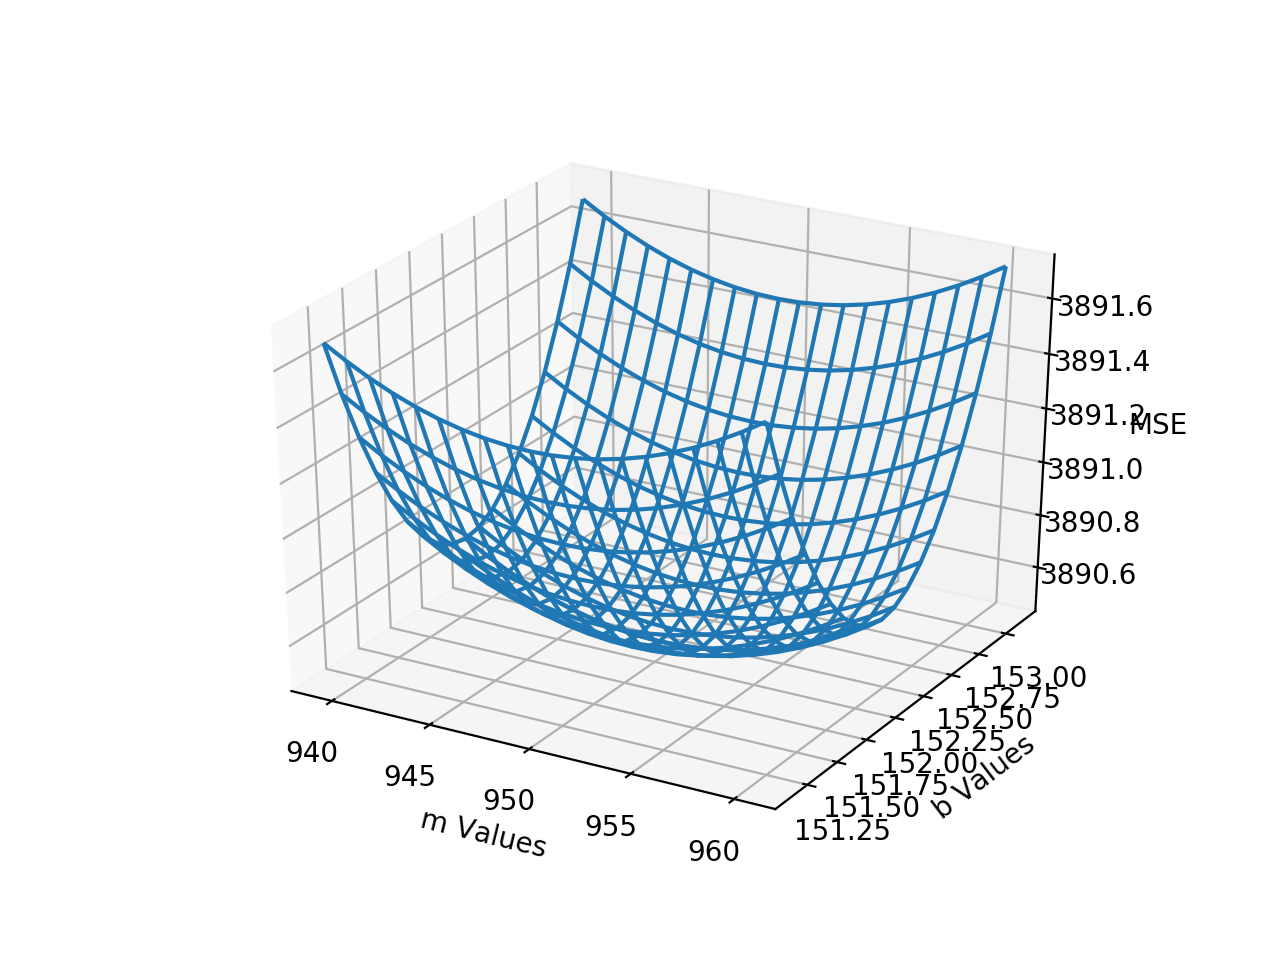

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
m_range = np.concatenate([np.linspace(best_params['m'] - 10, best_params['m'], num=10),
                          np.linspace(best_params['m'] + 1, best_params['m'] + 11, num=10)])

b_range = np.concatenate([np.linspace(best_params['b'] - 1, best_params['b'], num=10),
                          np.linspace(best_params['b'], best_params['b'] + 1, num=10)])

m_grid, b_grid = np.meshgrid(m_range, b_range)
zs = []
for m,b in zip(np.ravel(m_grid), np.ravel(b_grid)):
    linear_model = create_linear_model({"m":m, "b":b})
    tmp_preds = np.array([linear_model(x) for x in X])
    zs.append(mse(tmp_preds, y))
zs = np.array(zs)
Z = zs.reshape(m_grid.shape)

ax.plot_wireframe(m_grid, b_grid, Z)

ax.set_xlabel('m Values')
ax.set_ylabel('b Values')
ax.set_zlabel('MSE')

plt.show()

This model only has two parameters, or weights. By plotting the loss value for different combinations of the two, we can visualize the **loss surface** and can clearly see the minima. But how do we calculate these values?

In linear regression, there is a way to explicity solve for these values called **Ordinary Least Squares** that under certain assumptions is mathematically guaranteed to give you the best parameters. When we use scikit-learn's <tt>LinearRegression</tt> class and call <tt>fit</tt> on our data, it's using OLS to find the best parameters which we can plot on the loss surface:

<IPython.core.display.Javascript object>


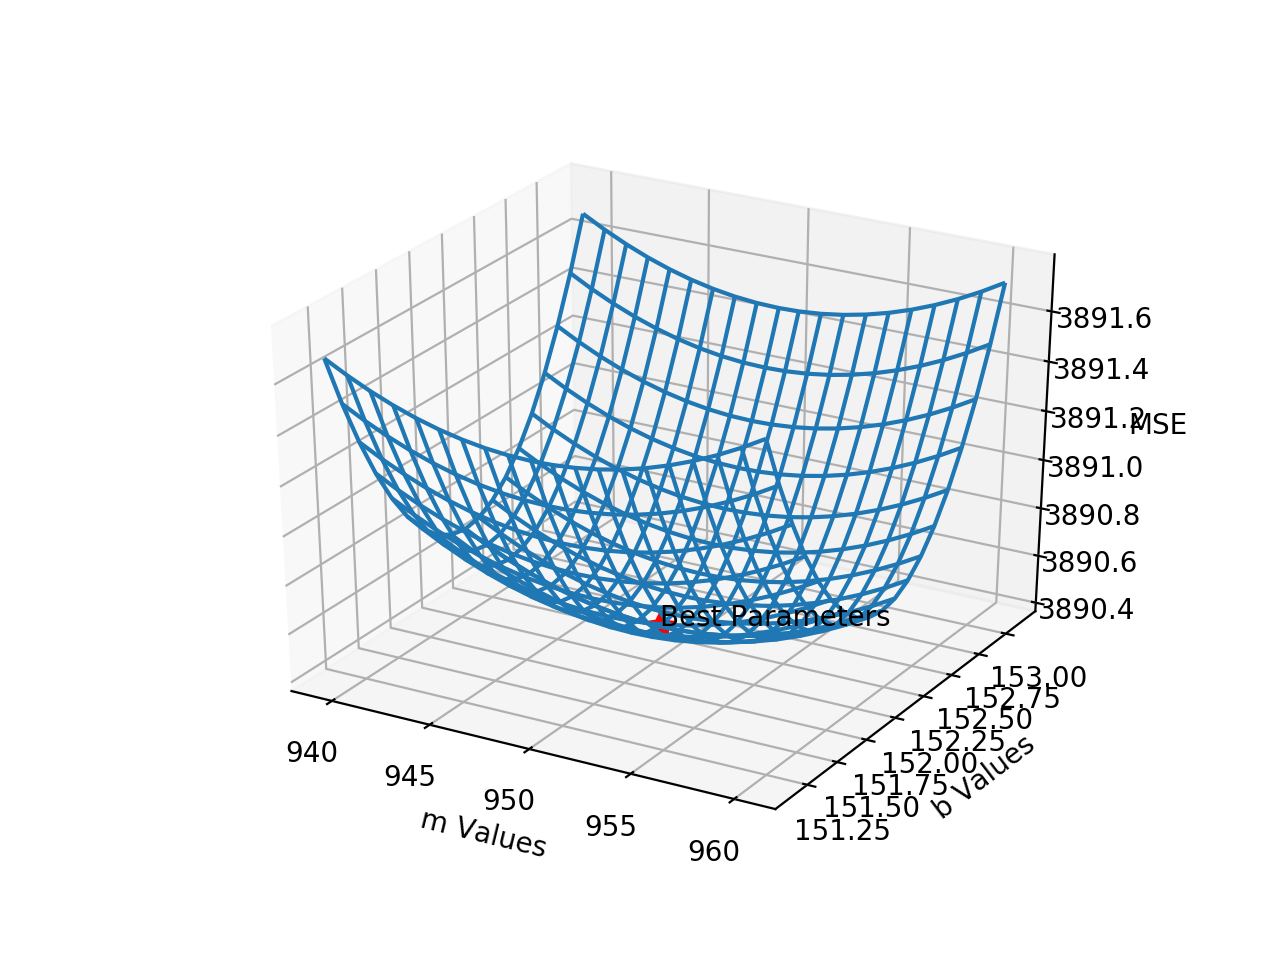

In [37]:
lr_model = LinearRegression()
lr_model.fit(X, y)
best_params = {"m":lr_model.coef_[0,0], "b":lr_model.intercept_[0]}
best_line_function = create_linear_model(best_params)
best_preds = np.array([best_line_function(x) for x in X])
best_loss = mse(best_preds, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(m_grid, b_grid, Z)
ax.scatter(best_params['m'], best_params['b'], best_loss, s=100, marker=(5,1), c='r')
ax.text(best_params['m'], best_params['b'], best_loss, "Best Parameters", zorder=1)

ax.set_xlabel('m Values')
ax.set_ylabel('b Values')
ax.set_zlabel('MSE')

plt.show()

Unfortunately, there is no parallel to OLS for neural networks, and instead optimal parameters are found through an optimization algorithm called **gradient descent**. Put simply, gradient descent works by starting with some random combination of parameters, and then moving each parameter down the slope of the loss surface to get closer to a minima.

#### Deep Dive on Gradient Descent
First, let's define a gradient. The gradient of a function is the multi-dimensional version of the **derivative**, which you may remember from calculus tells you the **rate of change** in a function for a specific point $x$. This can also be visualized as the slope of the tangent line:

<IPython.core.display.Javascript object>


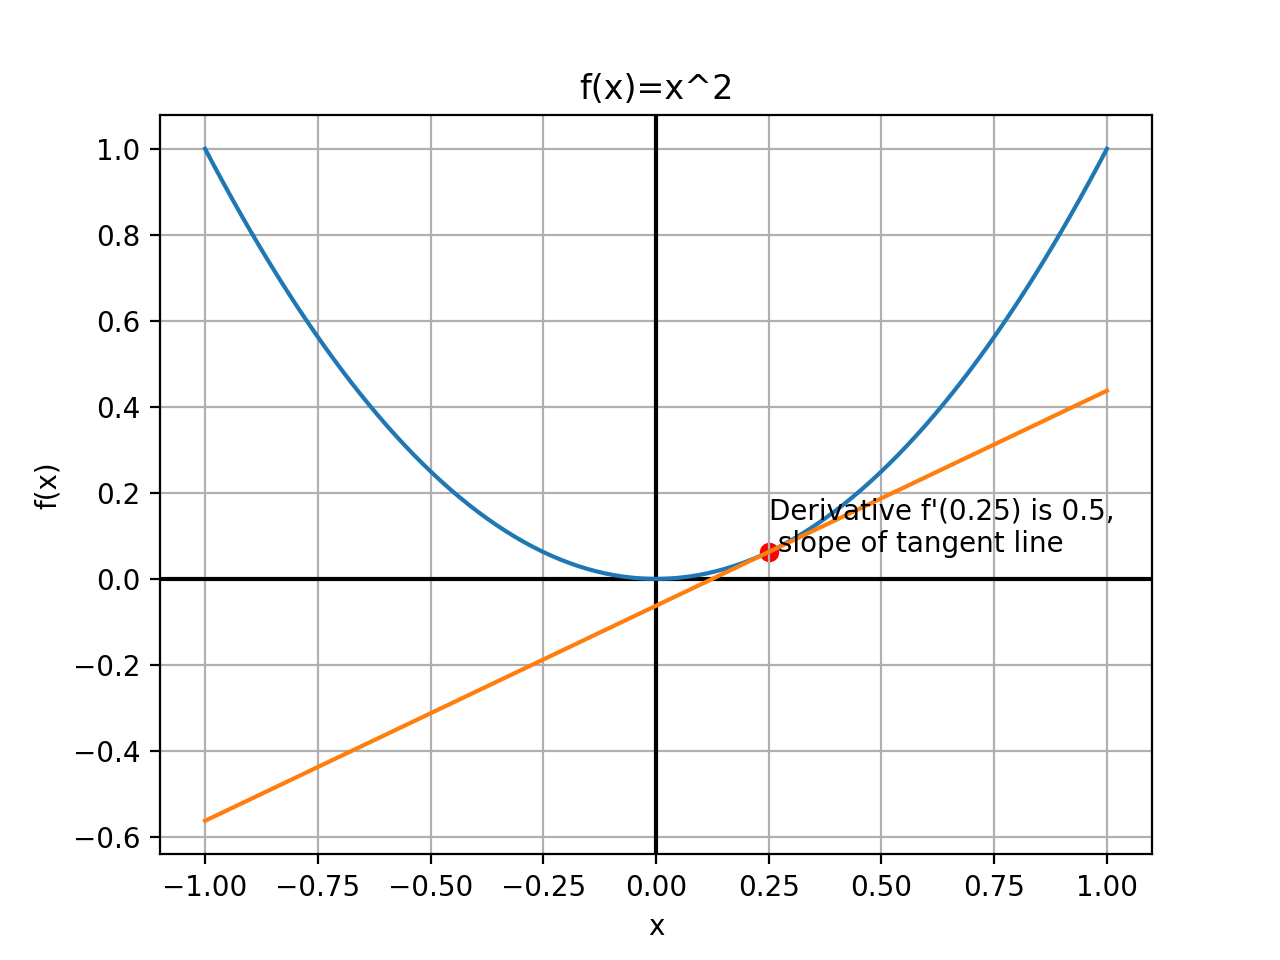

[]

In [38]:
fig, ax = plt.subplots()
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylabel("f(x)")
ax.set_xlabel("x")
ax.set_title("f(x)=x^2")
ax.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)**2)
ax.scatter(0.25, 0.25**2, c="r")
ax.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)*0.5 - 0.0625)
ax.text(0.25, 0.25**2, "Derivative f'(0.25) is 0.5,\n slope of tangent line")
ax.plot()

<IPython.core.display.Javascript object>


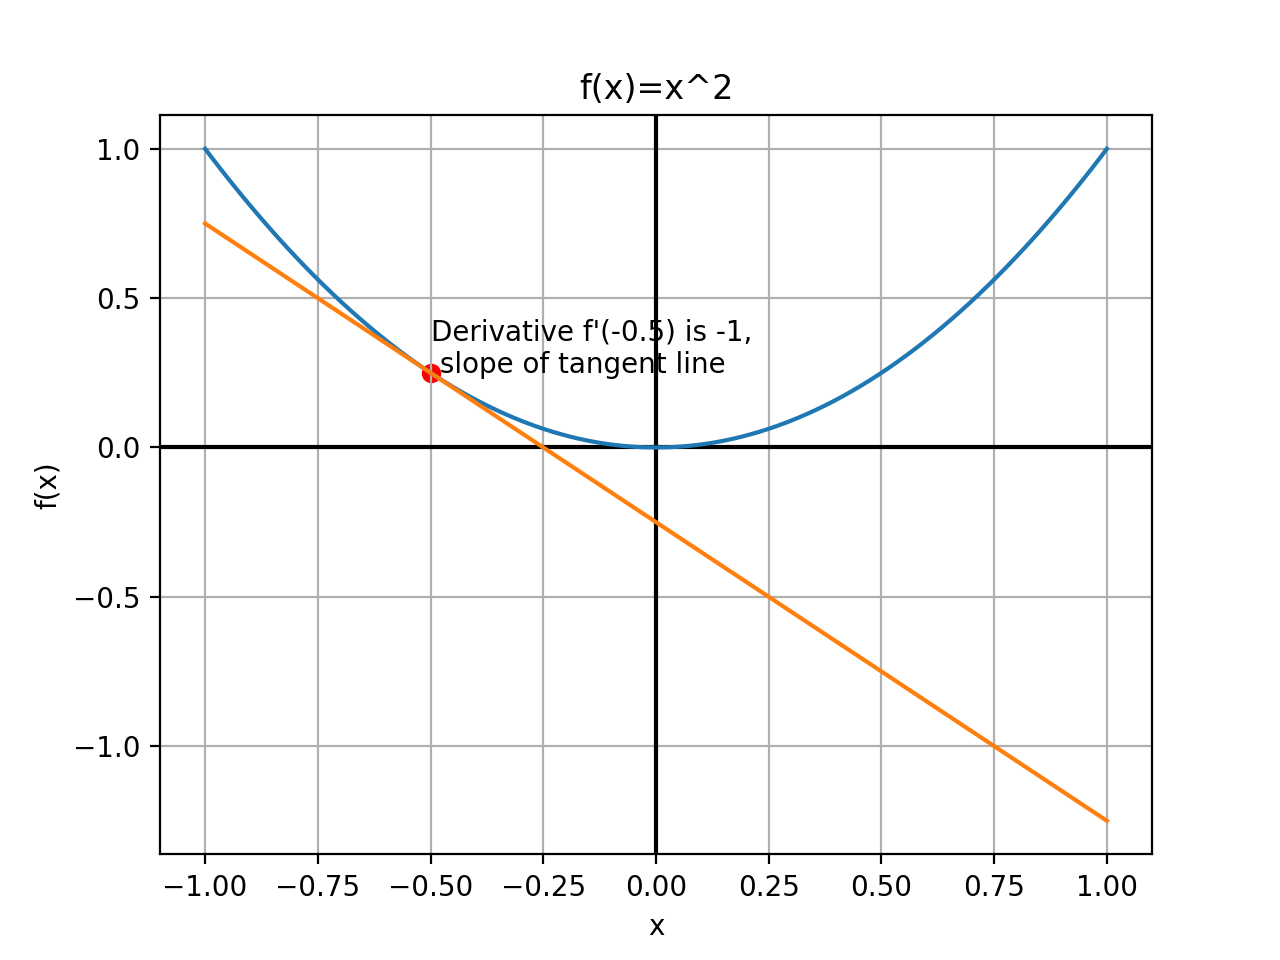

[]

In [39]:
fig, ax = plt.subplots()
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylabel("f(x)")
ax.set_xlabel("x")
ax.set_title("f(x)=x^2")
ax.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)**2)
ax.scatter(-0.5, 0.5**2, c="r")
ax.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)*-1 - 0.25)
ax.text(-0.5, 0.5**2, "Derivative f'(-0.5) is -1,\n slope of tangent line")
ax.plot()

The derivative tells you the tangential slope of the function at a given point. In the case of $f(x)=x^2$, you can see that whatever the derivative is, the minima is in **the opposite direction**. For example, the derivative $f'(0.25)$ is **positive**, and so the function is increasing and we want to move in the **negative** direction to find the minima. The same logic applies to $f'(-0.5)$

This logic is the crux of gradient descent, only now the function we want to minimize is the loss function $L$, and we take the derivatives of $L$ with respect to the model parameters. 

#### Gradient Descent on Linear Model

For a simple linear model, the algorithm works like this:

1. Choose random values for parameters m and b
2. Calculate f(x)=mx+b for all x in X
3. Calculate the mean-squared-error between model predictions and the true labels
4. Take the derivatives (called the gradient) of the loss function with respect to m and b
5. Update m by moving it in the opposite direction of the gradient
6. Update b by moving in the opposite direction of the gradient
7. Repeat steps 2-7 until the change in m and b is sufficiently small

When the parameters stop updating, the model has said to have **converged**. 

Mathematically, we can write out the update steps for $m$ and $b$:

$m_{n+1} = m_{n} - \gamma \frac{\partial}{\partial m} L$

$b_{n+1} = b_{n} - \gamma \frac{\partial}{\partial b} L $

where $\frac{\partial}{\partial x}$ is the **partial derivative** with respect to $x$. Both of these equations show how m and b are **updated** at each step n by moving in the opposite direction of the gradient. 

For an arbitrary number of parameters $\theta$, we can write this update equation as

$\theta_{n+1}=\theta_{n} - \gamma \nabla L$ where $\nabla$ is the gradient operator.

$\gamma$ in this equation is a very important hyperparameter that we call the step size or more commonly the **learning rate**. This determines how big of a step you take in each update. The gradient is only the tangential rate of change, the further you move away from where it was calculated the more room for error. A larger learning rate can cause faster convergence, but it can also be inaccurate. A smaller learning rate will be more accurate but can be slow.

To get a better understanding, let's perform this process manually. Looking at our data, we can make an educated guess for m and b:

<IPython.core.display.Javascript object>


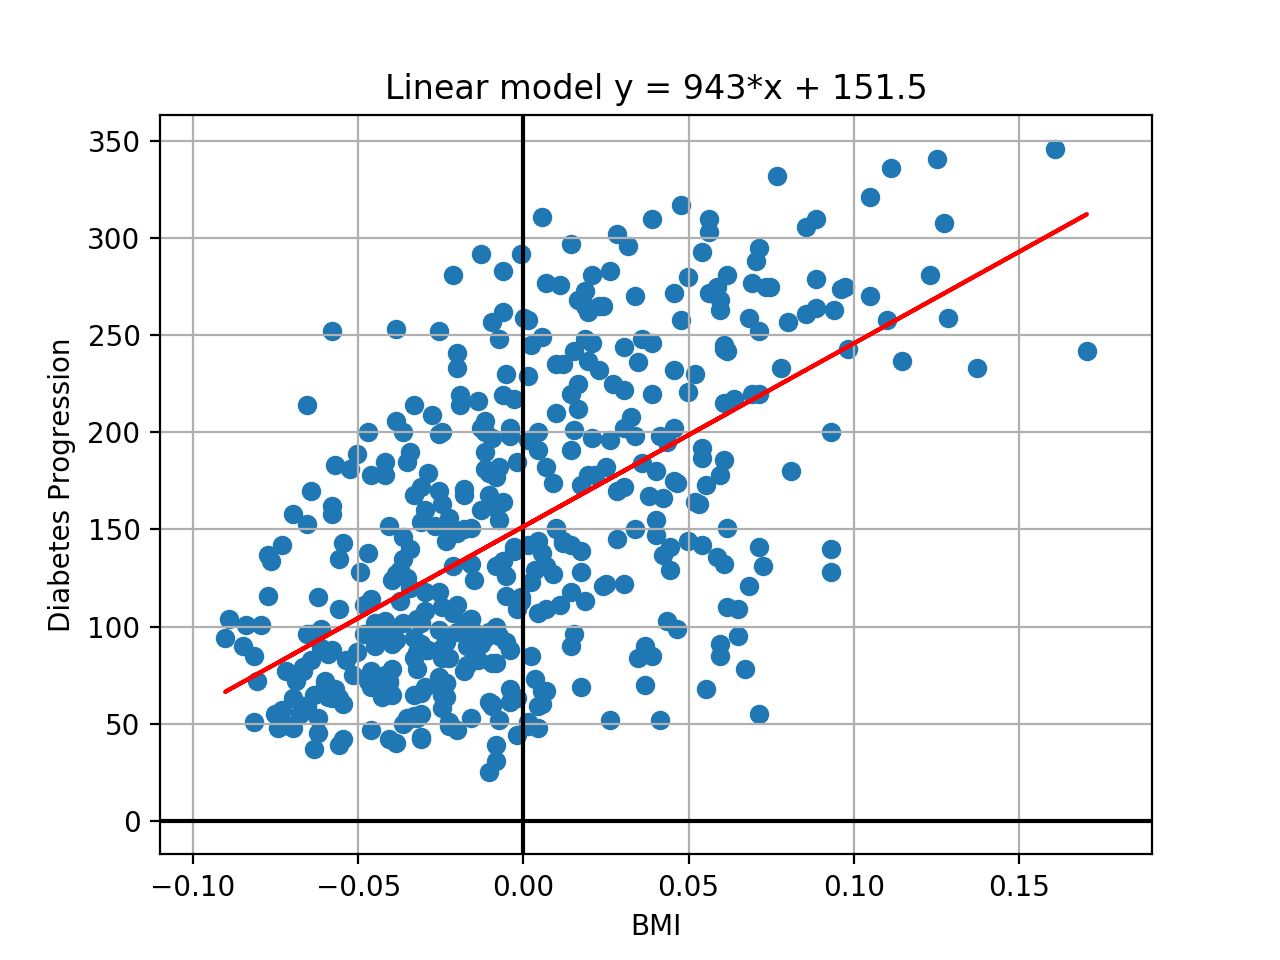

In [40]:
start_m = 943
start_b = 151.50
start_params = {"m":start_m, "b":start_b}


start_line_function = create_linear_model(start_params)
fig, ax = plt.subplots()
ax.scatter(X, y)
# ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
start = np.min(X)
stop = np.max(X)
start_preds = np.array([start_line_function(x) for x in X])
ax.set_title(f"Linear model y = {start_params['m']}*x + {start_params['b']}")
ax.set_xlabel("BMI")
ax.set_ylabel("Diabetes Progression")
ax.plot(X, start_preds, c='r')

Starting with this guess, let's calculate the loss for a linear model with these parameters.

In [41]:
start_preds = np.array([start_line_function(x) for x in X])
start_loss = mse(start_preds, y)
print(f"Initial loss of {start_loss}")

Initial loss of 3890.951581257246


Let's see where this is on the loss surface:

<IPython.core.display.Javascript object>


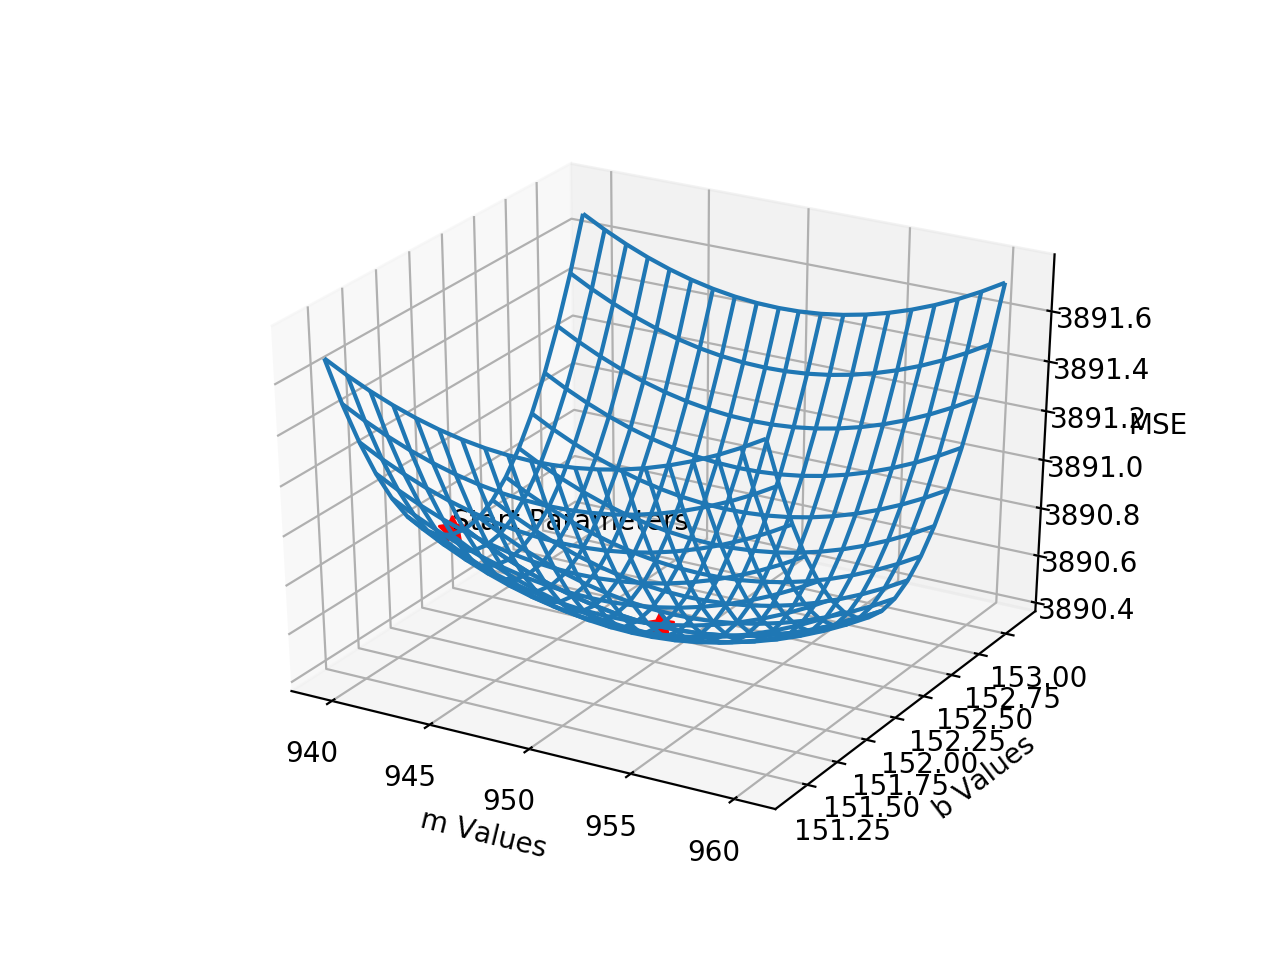

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(m_grid, b_grid, Z)
ax.scatter(start_params['m'], start_params['b'], start_loss, s=100, marker=(5,1), c='r')
ax.text(start_params['m'], start_params['b'], start_loss, "Start Parameters", zorder=1)

ax.set_xlabel('m Values')
ax.set_ylabel('b Values')
ax.set_zlabel('MSE')

plt.show()

Looking at the axes, it's clear that both $m$ and $b$ need to increase to move closer to the minima, and this will be reflected in gradient descent by a negative gradient

In order to figure out which direction to move $m$ and $b$, gradient descent finds the gradient of the loss function. We can get this by calculating the partial derivatives of the mean squared error for both $m$ and $b$. These are

$\frac{\partial}{\partial m}L=\frac{2}{N}\sum_i^N x(mx+b-y)$

$\frac{\partial}{\partial b}L=\frac{2}{N}\sum_i^N (mx+b-y)$

which we can define below:

In [43]:
def pd_mse_m(X, y, params):
    return 2*np.mean(X*(params['m']*X + params['b'] - y))

def pd_mse_b(X, y, params):
    return 2*np.mean(params['m']*X + params['b'] - y)

In [44]:
pd_m = pd_mse_m(X, y, start_params)
pd_b = pd_mse_b(X, y, start_params)

In [45]:
print(f"Partial derivatives of the loss function w.r.t\nm: {pd_m},\nb: {pd_b}")

Partial derivatives of the loss function w.r.t
m: -0.029118825266742098,
b: -1.2669683257933686


As expected, they are both negative. We can now update our parameters; we will use a learning rate of 0.1

In [46]:
lr = 1.0

new_m = start_m - lr*pd_m
new_b = start_b - lr*pd_b
new_params = {"m":new_m, "b":new_b}

Let's calculate the new loss:

In [47]:
new_line_function = create_linear_model(new_params)
new_preds = np.array([new_line_function(x) for x in X])
new_loss = mse(new_preds, y)
print(f"Initial loss of {start_loss} improved to {new_loss}")

Initial loss of 3890.951581257246 improved to 3890.9507352696005


Indeed the loss has decreased as expected. Let's create a function for this algorithm:

In [48]:
def gradient_descent(X, y, start_params, lr, epochs=1000):
    old_params = start_params
    old_linear_model = create_linear_model(old_params)
    old_preds = np.array([old_linear_model(x) for x in X])
    old_loss = mse(old_preds, y)
    i = 0
    ms = [old_params['m']]
    bs = [old_params['b']]
    losses = [old_loss]
    for i in range(epochs):
        pd_m = pd_mse_m(X, y, old_params)
        pd_b = pd_mse_b(X, y, old_params)
        new_m = old_params['m'] - lr*pd_m
        new_b = old_params['b'] - lr*pd_b
        new_params = {"m":new_m, "b":new_b}
        new_linear_model = create_linear_model(new_params)
        new_preds = np.array([new_linear_model(x) for x in X])
        new_loss = mse(new_preds, y)
        ms.append(new_params['m'])
        bs.append(new_params['b'])
        losses.append(new_loss)
        old_params = new_params
        old_preds = new_preds
    return new_params, ms, bs, losses

We're going to run the algorithm for 1000 iterations/updates, which are called **epochs**.

In [49]:
epochs = 1000
gd_params, ms, bs, losses = gradient_descent(X, y, start_params, lr=0.01, epochs=epochs)

Let's see how these results compare with the OLS estimates:

In [50]:
print(f"After {epochs} iterations of gradient descent:\
\nStart params: {start_params}\nG.D. params:{gd_params}\nOLS best params:{best_params}")

After 1000 iterations of gradient descent:
Start params: {'m': 943, 'b': 151.5}
G.D. params:{'m': 943.284704831952, 'b': 152.13348416183058}
OLS best params:{'m': 949.4352603839491, 'b': 152.1334841628967}


We can also plot the loss over iterations:

<IPython.core.display.Javascript object>


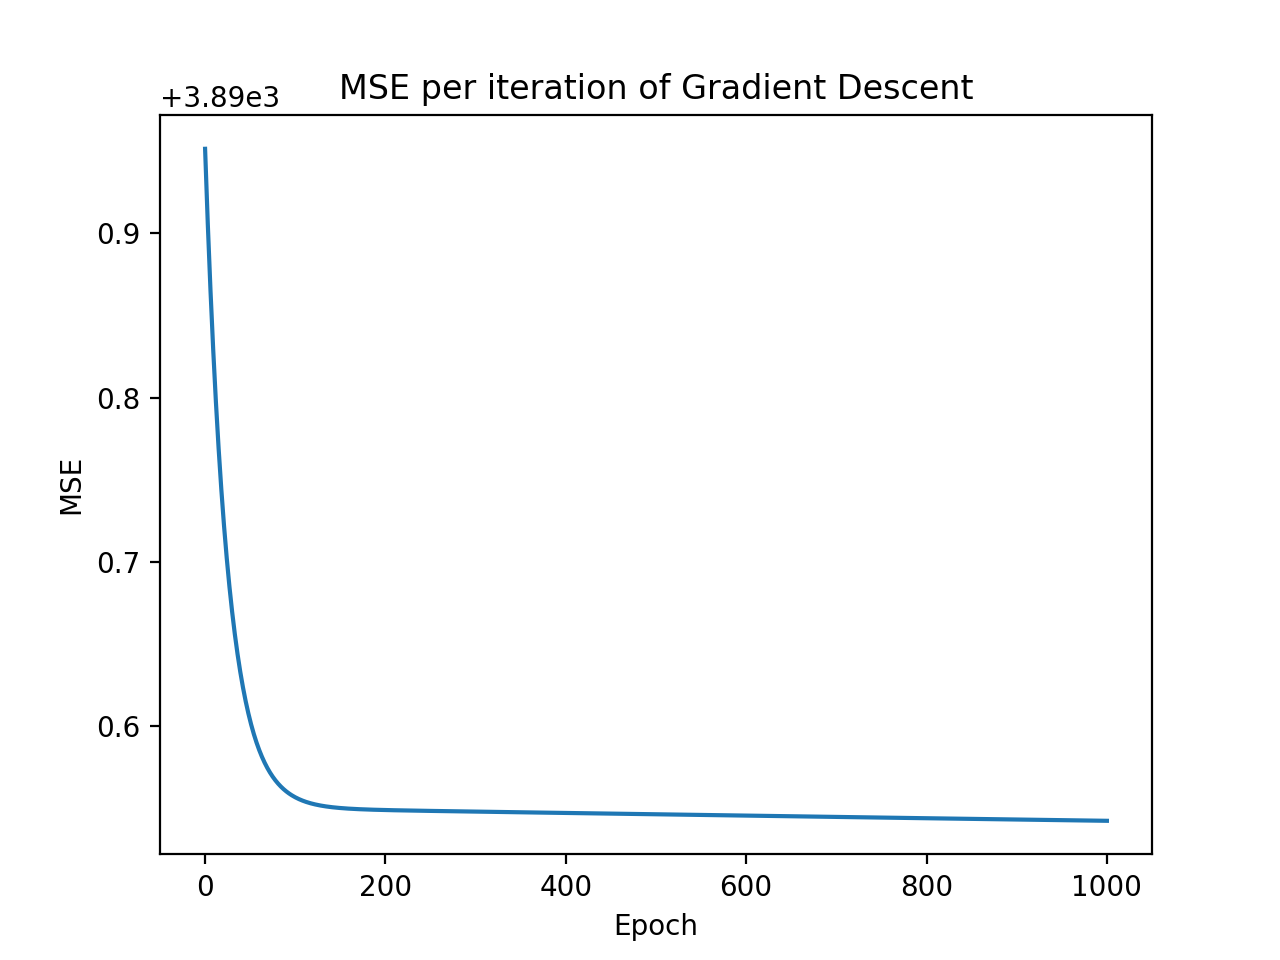

In [51]:
fig = plt.figure()
plt.title("MSE per iteration of Gradient Descent")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(losses)

We can see that after 100 epochs or so, the loss curve starts to flatten out. This pattern of diminishing returns is a strong indicator that gradient descent has converged. While a larger learning rate can cause quicker convergence, if it's too big the algorithm will overshoot and the loss will get even bigger.

Let's visualize the parameter updates on the loss surface:

<IPython.core.display.Javascript object>


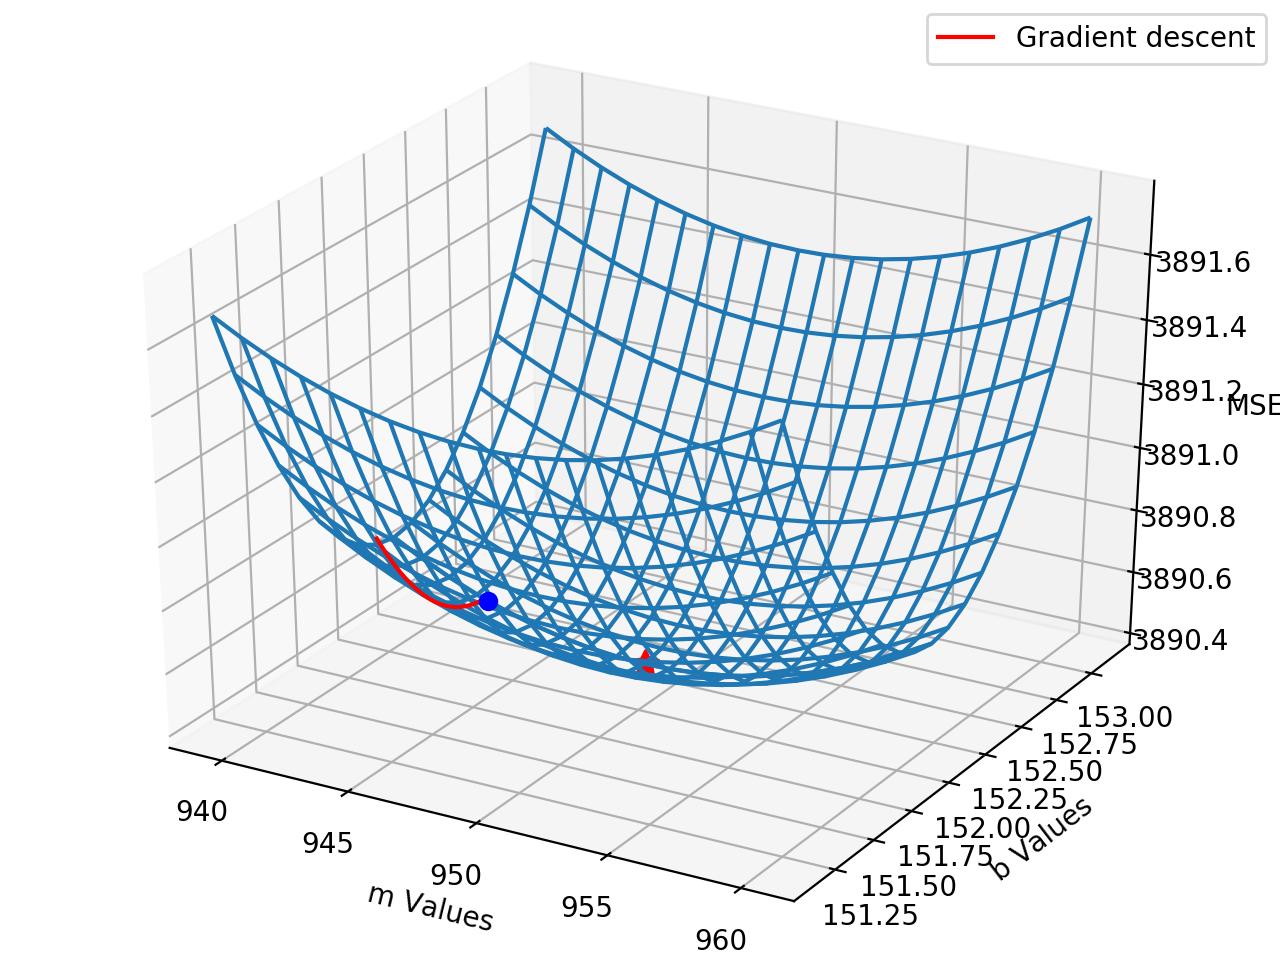

In [52]:
# visualization code from https://jed-ai.github.io/py1_gd_animation/
fig1 = plt.figure()
ax1 = Axes3D(fig1)
surf = ax1.plot_wireframe(m_grid, b_grid, Z, rstride=1,
                        cstride=1)

# Plot target (the minimum of the function)
ax1.scatter(best_params['m'], best_params['b'], best_loss, s=100, marker=(5,1), c='r')

ax1.set_xlabel('m Values')
ax1.set_ylabel('b Values')
ax1.set_zlabel('MSE')

line, = ax1.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], [], 'bo')
display_value = ax1.text(2., 2., 27.5, '', transform=ax1.transAxes)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    display_value.set_text('')

    return line, point, display_value

def animate(i):
    # Animate line
    line.set_data(ms[:i], bs[:i])
    line.set_3d_properties(losses[:i])
    
    # Animate points
    point.set_data(ms[i], bs[i])
    point.set_3d_properties(losses[i])

    # Animate display value
    display_value.set_text('Min = ' + str(losses[i]))

    return line, point, display_value

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(ms), interval=120, 
                               repeat_delay=60, blit=True)

plt.show()

You can see that at first the algorithm moves quickly down the slope, but once it reaches the bottom it starts to move slowly. This is because the loss changes more slowly in along the $m$ axis. Different implementations of the gradient descent algorithm help mitigate this problem.

**Try running gradient descent with different learning rates between 0.0001 and 1.0. Plot the parameter trajectory to see how smaller and larger learning rates affect convergence.**

In [59]:
lr = INSERT_LR
gd_params, ms, bs, losses = gradient_descent(X, y, start_params, lr)

In [60]:
print(f"After {epochs} iterations of gradient descent:\
\nStart params: {start_params}\nG.D. params:{gd_params}\nOLS best params:{best_params}")

After 1000 iterations of gradient descent:
Start params: {'m': 943, 'b': 151.5}
G.D. params:{'m': 945.3425754724728, 'b': 152.13348416289662}
OLS best params:{'m': 949.4352603839491, 'b': 152.1334841628967}


<IPython.core.display.Javascript object>


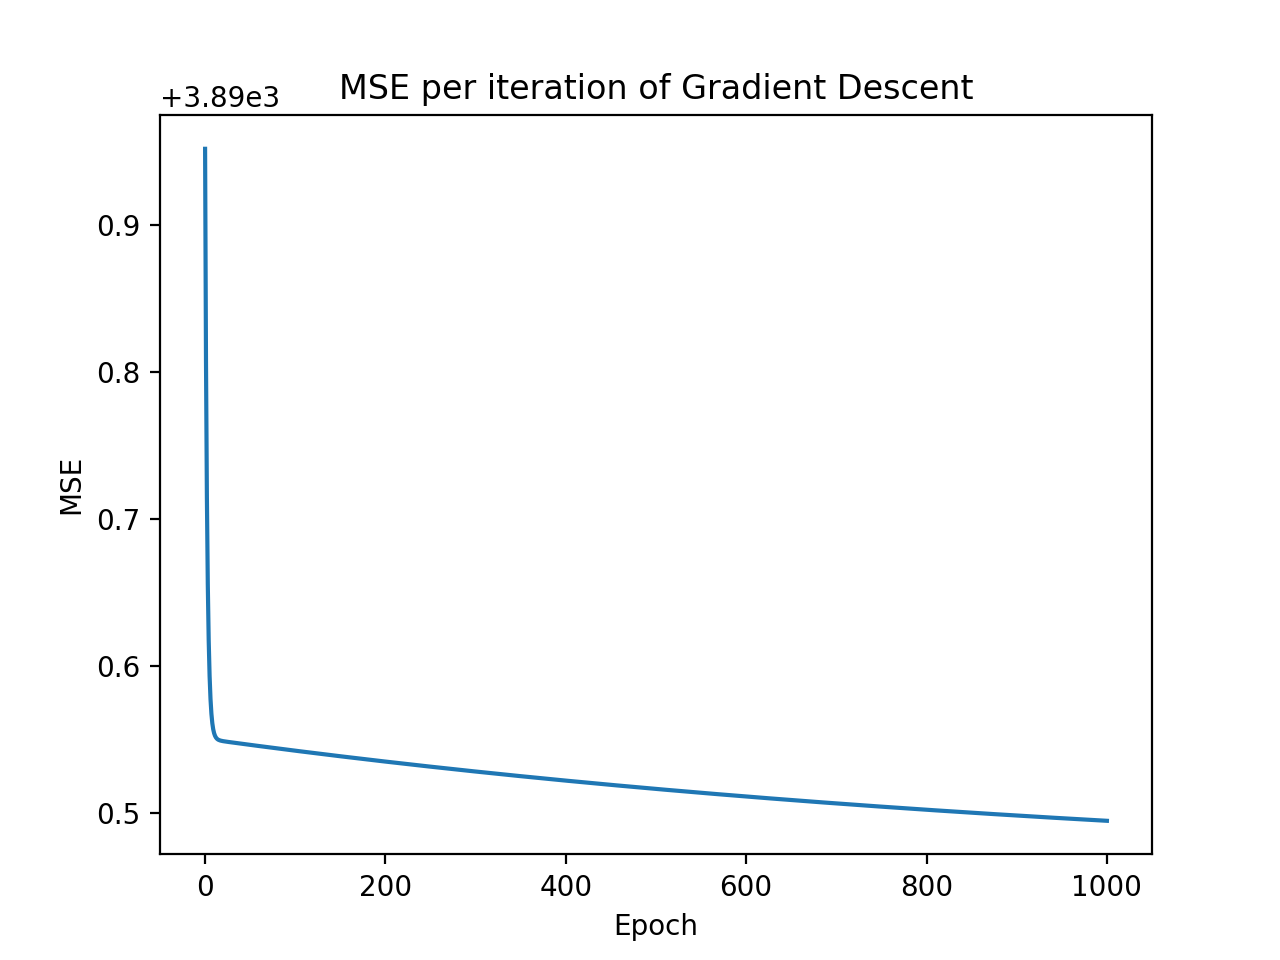

In [61]:
fig = plt.figure()
plt.title(f"MSE per iteration of Gradient Descent")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(losses)

<IPython.core.display.Javascript object>


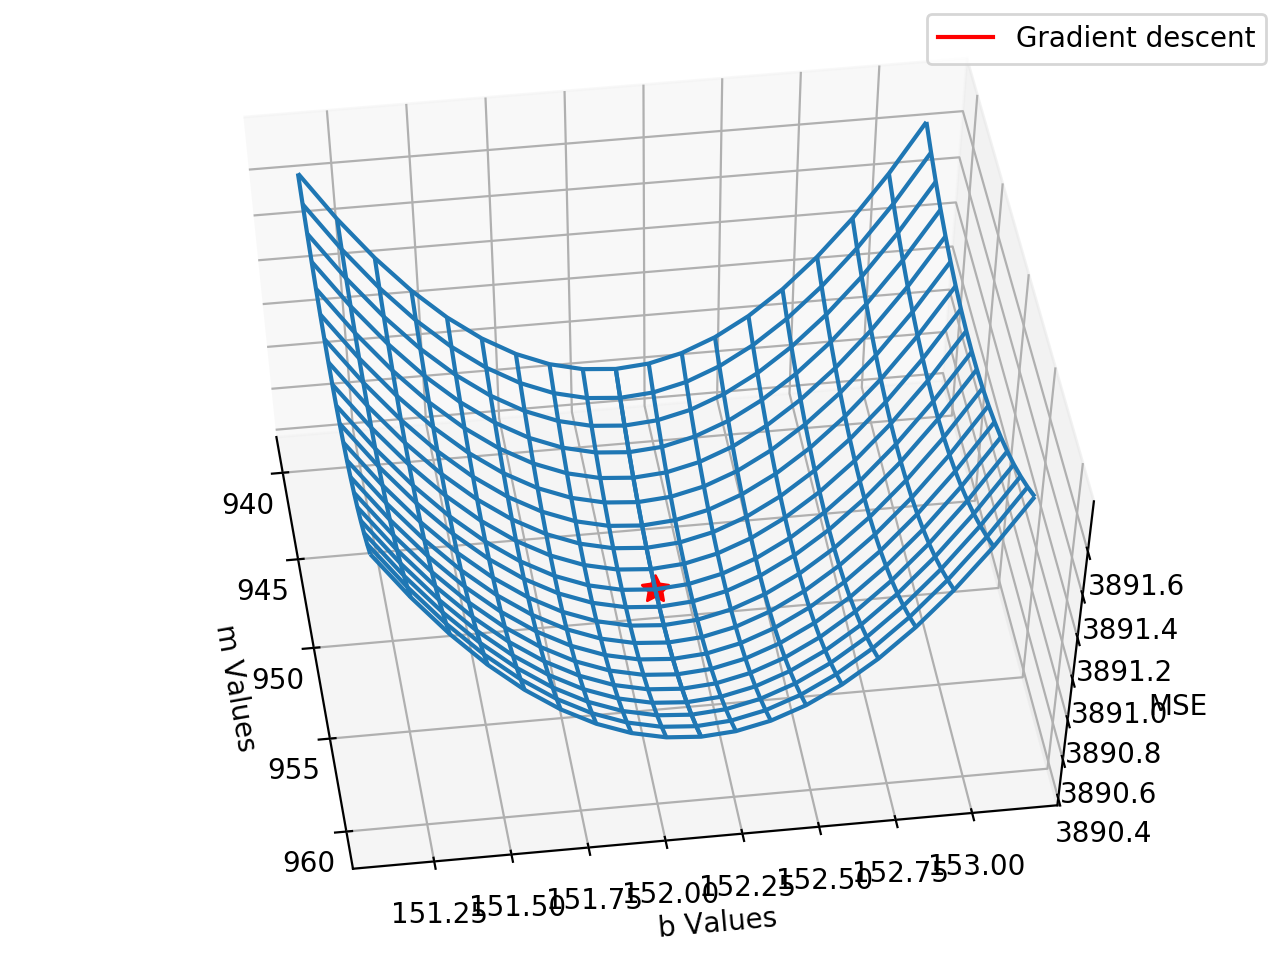

In [62]:
# visualization code from https://jed-ai.github.io/py1_gd_animation/
fig1 = plt.figure()
ax1 = Axes3D(fig1)
surf = ax1.plot_wireframe(m_grid, b_grid, Z, rstride=1,
                        cstride=1)

# Plot target (the minimum of the function)
ax1.scatter(best_params['m'], best_params['b'], best_loss, s=100, marker=(5,1), c='r')

ax1.set_xlabel('m Values')
ax1.set_ylabel('b Values')
ax1.set_zlabel('MSE')

line, = ax1.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], [], 'bo')
display_value = ax1.text(2., 2., 27.5, '', transform=ax1.transAxes)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    display_value.set_text('')

    return line, point, display_value

def animate(i):
    # Animate line
    line.set_data(ms[:i], bs[:i])
    line.set_3d_properties(losses[:i])
    
    # Animate points
    point.set_data(ms[i], bs[i])
    point.set_3d_properties(losses[i])

    # Animate display value
    display_value.set_text('Min = ' + str(losses[i]))

    return line, point, display_value

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(ms), interval=120, 
                               repeat_delay=60, blit=True)

plt.show()

#### Gradient Descent on our Simple Neural Network

Now that we understand the fundamental concepts behind gradient descent, we can use this algorithm to learn the parameters for our simple neural network. This time we have four parameters $m_h$, $b_h$, $m_o$, and $b_o$, two for each neuron, which means we need four partial derivatives:

$\frac{\partial}{\partial m_h} L= \left\{
\begin{array}{ll}
      0 \text{ if } m_h x + b_h \leq 0 \\
      \frac{2m_o}{N}\sum_i^N x (m_o(m_h x + b_h) + b_o - y)\\
\end{array} 
\right.$

$\frac{\partial}{\partial b_h} L= \left\{
\begin{array}{ll}
      0 \text{ if } m_h x + b_h \leq 0 \\
      \frac{2m_o}{N}\sum_i^N (m_o(m_h x + b_h) + b_o - y)\\
\end{array} 
\right.$

$\frac{\partial}{\partial m_o} L= \left\{
\begin{array}{ll}
      0 \text{ if } m_h x + b_h \leq 0 \\
      \frac{2}{N}\sum_i^N ( m_h x +b_h) (m_o(m_h x +b_h) +b_o - y)\\
\end{array} 
\right.$

$\frac{\partial}{\partial b_o} L= \left\{
\begin{array}{ll}
      \frac{2}{N}\sum_i^N (b_o - y) \text{ if } m_h x + b_h \leq 0 \\
      \frac{2}{N}\sum_i^N (m_o (m_h x + b_h) + b_o - y)\\
\end{array} 
\right.$

In [63]:
def pd_mse_mh(X, y, params):
    h_linear = X*params['m_h'] + params['b_h']
    zero_mask = (h_linear >= 0).astype(int)
    return 2*params['m_o']*np.mean((X*(params['m_o'] * h_linear + params['b_o'] - y))*zero_mask)

def pd_mse_bh(X, y, params):
    h_linear = X*params['m_h'] + params['b_h']
    zero_mask = (h_linear >= 0).astype(int)
    return 2*params['m_o']*np.mean((params['m_o'] * h_linear + params['b_o'] - y)*zero_mask)

def pd_mse_mo(X, y, params):
    h_linear = X*params['m_h'] + params['b_h']
    zero_mask = (h_linear >= 0).astype(int)
    return 2*np.mean((h_linear*(params['m_o'] * h_linear + params['b_o'] - y))*zero_mask)

    
def pd_mse_bo(X, y, params):
    h_linear = X*params['m_h'] + params['b_h']
    zero_indices = (h_linear < 0)
    out = (params['m_o'] * h_linear + params['b_o'] - y)
    out[zero_indices] = 2*(params['b_o'] - y[zero_indices])
    return 2*np.mean(out)

Let's modify our algorithm from before to account for all four parameter updates:

In [64]:
def gradient_descent_net(X, y, start_params, lr, epochs=1000):
    old_params = start_params
    old_simple_net = SimpleNN(relu, linear, old_params)
    old_preds = np.array([old_simple_net.forward(x) for x in X])
    old_loss = mse(old_preds, y)
    i = 0
    losses = [old_loss]
    for i in range(epochs):
        pd_mh = pd_mse_mh(X, y, old_params)
        pd_bh = pd_mse_bh(X, y, old_params)
        pd_mo = pd_mse_mo(X, y, old_params)
        pd_bo = pd_mse_bo(X, y, old_params)
        new_mh = old_params['m_h'] - lr*pd_mh
        new_bh = old_params['b_h'] - lr*pd_bh
        new_mo = old_params['m_o'] - lr*pd_mo
        new_bo = old_params['b_o'] - lr*pd_bo
        new_params = {"m_h":new_mh, "b_h":new_bh, "m_o":new_mo, "b_o":new_bo}
        new_simple_net = SimpleNN(relu, linear, new_params)
        new_preds = np.array([new_simple_net.forward(x) for x in X])
        new_loss = mse(new_preds, y)
        losses.append(new_loss)
        old_params = new_params
        old_preds = new_preds
    return new_params, losses

In [65]:
epochs = 100
start_net_params = {'m_h': 1.0, 'b_h': 3.0, 'm_o': 10.0, 'b_o': 5.0}

In [66]:
params, losses = gradient_descent_net(X, y, start_net_params, 0.001, epochs)

In [67]:
print(f"Gradient descent for {epochs} epochs.\nStarting MSE: {losses[0]}\nFinal MSE: {losses[-1]}")

Gradient descent for 100 epochs.
Starting MSE: 19650.364253393665
Final MSE: 5952.753751496534


<IPython.core.display.Javascript object>


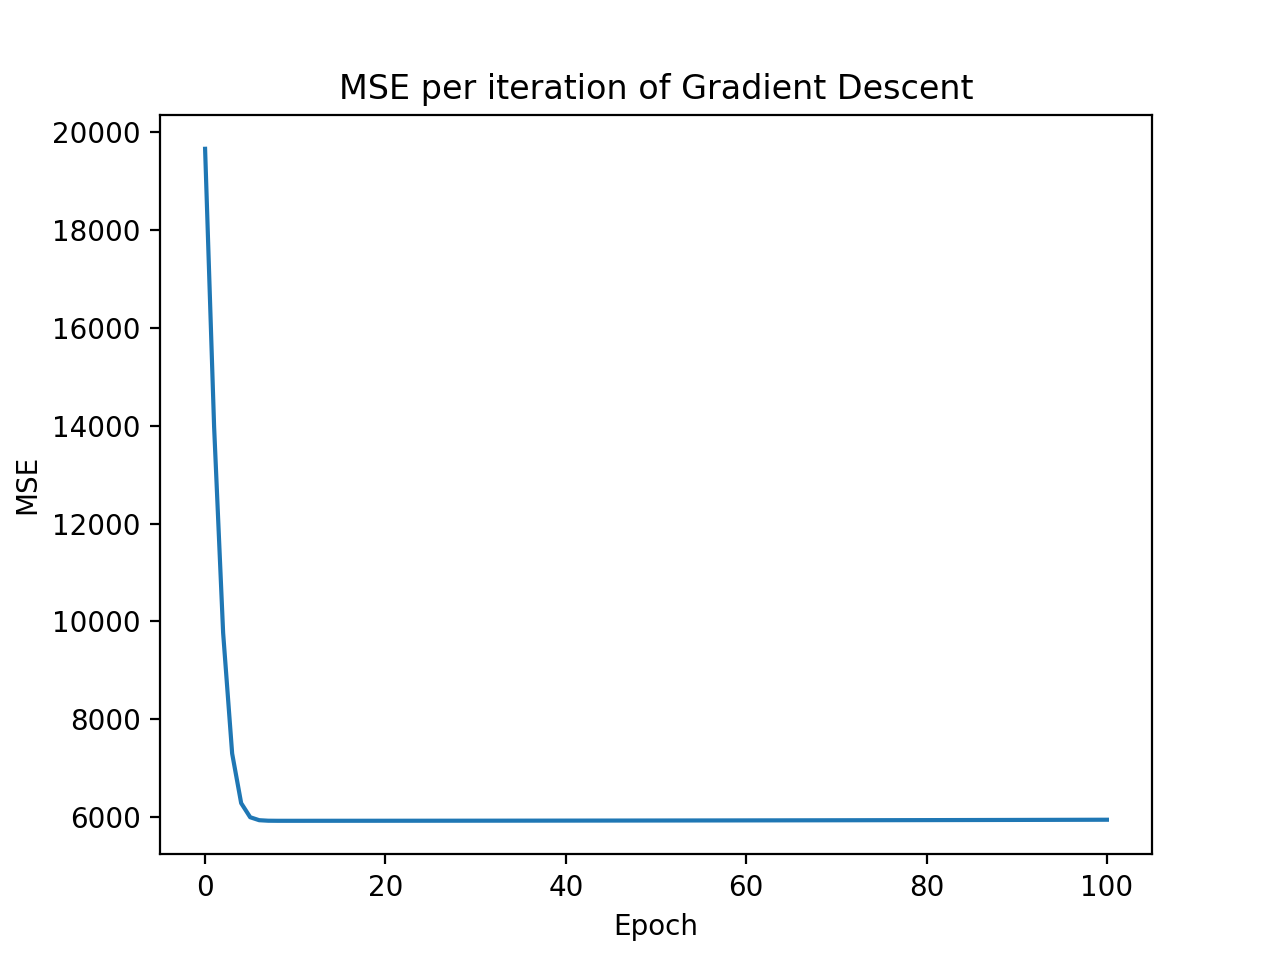

In [68]:
fig = plt.figure()
plt.title("MSE per iteration of Gradient Descent")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(range(len(losses)), losses)

Great, we can see that the model is indeed learning! But it's actually performing **worse** than the linear model. Why?

Unlike the linear model, the loss function for this neural network is **bumpy**. In other words, it has lots of peaks and valleys, and the gradient descent algorithm can get **stuck** in a **local minima**. Our selection of initial parameters as well as the learning rate have a big impact on how well gradient descent works, which is one reason why hyperparameter tuning is so important in deep learning.

**Try choosing your own initial parameters and learning rate to get the best results.**

In [69]:
lr = INSERT_LR
epochs = INSERT_EPOCHS
start_net_params = {'m_h': INSERT_MH, 'b_h': INSERT_BH, 'm_o': INSERT_MO, 'b_o': INSERT_BO}
params, losses = gradient_descent_net(X, y, start_net_params, lr, epochs)

In [70]:
print(f"Gradient descent for {epochs} epochs.\nStarting MSE: {losses[0]}\nFinal MSE: {losses[-1]}")

Gradient descent for 100 epochs.
Starting MSE: 19650.364253393665
Final MSE: 5952.753751496534


<IPython.core.display.Javascript object>


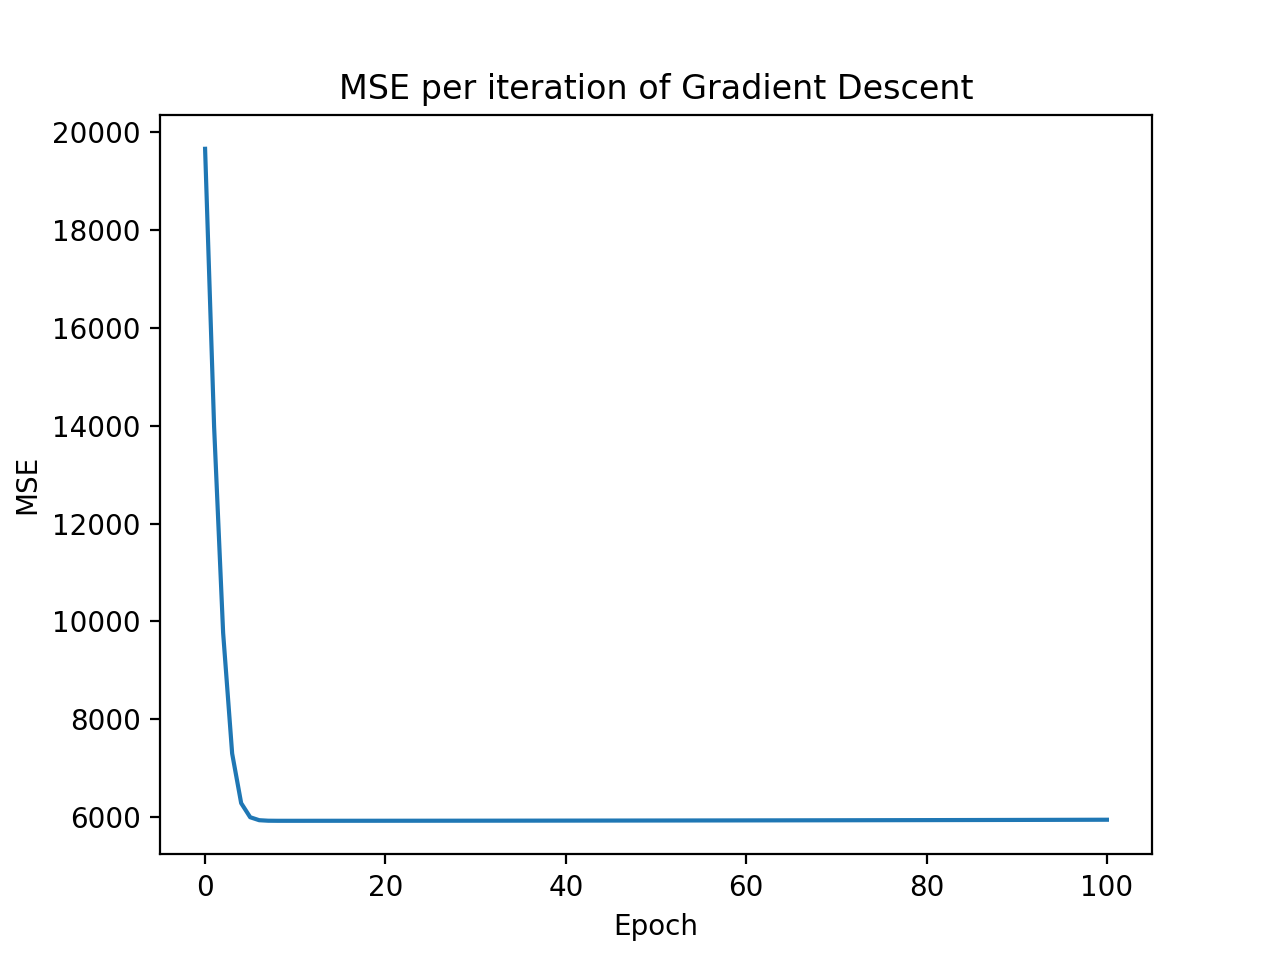

In [71]:
fig = plt.figure()
plt.title("MSE per iteration of Gradient Descent")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(range(len(losses)), losses)

As you can see, picking optimal starting parameters and learning rate for training neural networks is difficult. When your network has millions of parameters, as most do, it becomes downright impossible. Fortunately, much work has been done to help make this process easier, as well see in the next section.

### Deep Learning Frameworks: TensorFlow + Keras

Our simple neural network had exactly one feature, and one hidden layer with one neuron. Typically, neural networks have millions of parameters, and this presents many challenges. Deep Learning frameworks such as Tensorflow, PyTorch, and MXNet have sprung up to help solve these challenges. Deep learning frameworks:
* Provide convenient abstractions for neural networks
* Automate partial differentiation for parameter update
* Allows for accelerated compute, leveraging CuDNN and CUDA to train neural networks on GPU's

That last two points are critical. Automatically differentiating millions of parameters is a monumental task, and oftentimes it's not feasible to train a neural network on a CPU. The high-throughput GPUs allow for make them ideal for training neural networks, and deep learning frameworks are designed to support this acceleration. However, there are many different ways to support this, which is why there are many different frameworks available.

We're going to use Tensorflow in this example, but rather than use native TF we're going to use the Keras frontend. The Keras API provides convenient abstraction at the layer level, and is very user-friendly. 

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


We're going to look at the diabetes dataset again, but this time we're going to use all ten features as inputs. Then we'll do a split as last time.

In [73]:
X = diabetes_dataset['data']
y = diabetes_dataset['target'][:,np.newaxis]
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1984)

Next, we're going to create a neural network using Keras. This time however, we won't need to pick initial parameters. Keras, and other deep learning frameworks, use special heuristics to initialize parameters in a "good" way. We're also going to use a variant of gradient descent called **Adam**, which attempts to mitigate some of the issues we encountered earlier. 

We're going to introduce one more concept before we start training our model. Earlier we talked about the problem of **overfitting**; neural networks are particularly prone to this. Techniques for preventing overfitting are called **regularization**, and a popular regularization technique in deep learning is called **dropout**. Dropout works by setting individual neurons to zero with some probability. This forces the network to learn more general parameters by preventing what's called complex co-adaptation.

In [74]:
def create_network(input_configuration, input_shape, drop_prob=0.5, lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0):

    model = Sequential()
    for i, config in enumerate(input_configuration):
        if i == 0:
            model.add(Dense(config[0], activation=config[1], input_dim=input_shape))
        else:
            model.add(Dense(config[0], activation=config[1]))
        model.add(Dropout(drop_prob))
    model.add(Dense(1, activation="linear"))
    adam = Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, decay=decay)
    model.compile(loss='mse', optimizer=adam)
    return model

You're going to have the following hyperparameters to tune:
* <tt>input_configuration</tt>: A list of the form <tt>[[num_hidden_units, activation]]</tt> with as many for the number of layers you want.
* <tt>drop_prob</tt>: The probability of dropout applied at each layer
* <tt>lr</tt>, <tt>beta_1</tt>, <tt>beta_2</tt>, <tt>decay</tt>: Parameters for the Adam optimizer

There are additional parameters you can change as well, which you can learn more about in the [documentation](https://keras.io/layers/core/).

In [75]:
model = create_network([[200, "relu"], [100, "relu"]], 10)

Now we're going to train the model. Note that with neural networks, we typically update parameters on "batches" of data at a time, rather than the whole dataset.

In [76]:
history = model.fit(train_X, train_y, validation_data=(val_X, val_y),
          epochs=200,
          batch_size=128)

Train on 353 samples, validate on 89 samples
Epoch 1/200
353/353 [==============================] - 1s 2ms/step - loss: 29360.9376 - val_loss: 27858.6094
Epoch 2/200
353/353 [==============================] - 0s 53us/step - loss: 29339.6663 - val_loss: 27833.0645
Epoch 3/200
353/353 [==============================] - 0s 50us/step - loss: 29311.9180 - val_loss: 27801.4414
Epoch 4/200
353/353 [==============================] - 0s 55us/step - loss: 29276.8299 - val_loss: 27762.1738
Epoch 5/200
353/353 [==============================] - 0s 45us/step - loss: 29234.2155 - val_loss: 27713.4160
Epoch 6/200
353/353 [==============================] - 0s 47us/step - loss: 29182.2359 - val_loss: 27652.9043
Epoch 7/200
353/353 [==============================] - 0s 51us/step - loss: 29112.6943 - val_loss: 27578.1816
Epoch 8/200
353/353 [==============================] - 0s 56us/step - loss: 29033.1568 - val_loss: 27486.8457
Epoch 9/200
353/353 [==============================] - 0s 46us/step - loss: 

353/353 [==============================] - 0s 39us/step - loss: 3771.8359 - val_loss: 3613.9609
Epoch 76/200
353/353 [==============================] - 0s 38us/step - loss: 4042.7688 - val_loss: 3604.0720
Epoch 77/200
353/353 [==============================] - 0s 46us/step - loss: 3732.4846 - val_loss: 3594.4143
Epoch 78/200
353/353 [==============================] - 0s 42us/step - loss: 4012.6441 - val_loss: 3585.1289
Epoch 79/200
353/353 [==============================] - 0s 46us/step - loss: 3916.2850 - val_loss: 3575.9783
Epoch 80/200
353/353 [==============================] - 0s 46us/step - loss: 3853.3322 - val_loss: 3567.0403
Epoch 81/200
353/353 [==============================] - 0s 44us/step - loss: 3776.5715 - val_loss: 3558.0698
Epoch 82/200
353/353 [==============================] - 0s 43us/step - loss: 3648.0073 - val_loss: 3549.5254
Epoch 83/200
353/353 [==============================] - 0s 47us/step - loss: 3854.2394 - val_loss: 3540.8733
Epoch 84/200
353/353 [==========

Epoch 150/200
353/353 [==============================] - 0s 38us/step - loss: 3545.2104 - val_loss: 3213.9429
Epoch 151/200
353/353 [==============================] - 0s 42us/step - loss: 3744.1510 - val_loss: 3209.4263
Epoch 152/200
353/353 [==============================] - 0s 36us/step - loss: 3515.7426 - val_loss: 3205.8286
Epoch 153/200
353/353 [==============================] - 0s 44us/step - loss: 3576.5824 - val_loss: 3202.4585
Epoch 154/200
353/353 [==============================] - 0s 38us/step - loss: 3687.1371 - val_loss: 3199.5015
Epoch 155/200
353/353 [==============================] - 0s 40us/step - loss: 3644.9986 - val_loss: 3197.8044
Epoch 156/200
353/353 [==============================] - 0s 42us/step - loss: 3480.4368 - val_loss: 3196.0234
Epoch 157/200
353/353 [==============================] - 0s 35us/step - loss: 3423.1681 - val_loss: 3193.7051
Epoch 158/200
353/353 [==============================] - 0s 38us/step - loss: 3385.9410 - val_loss: 3191.0962
Epoch 159/

Now we can plot our loss over time:

<IPython.core.display.Javascript object>


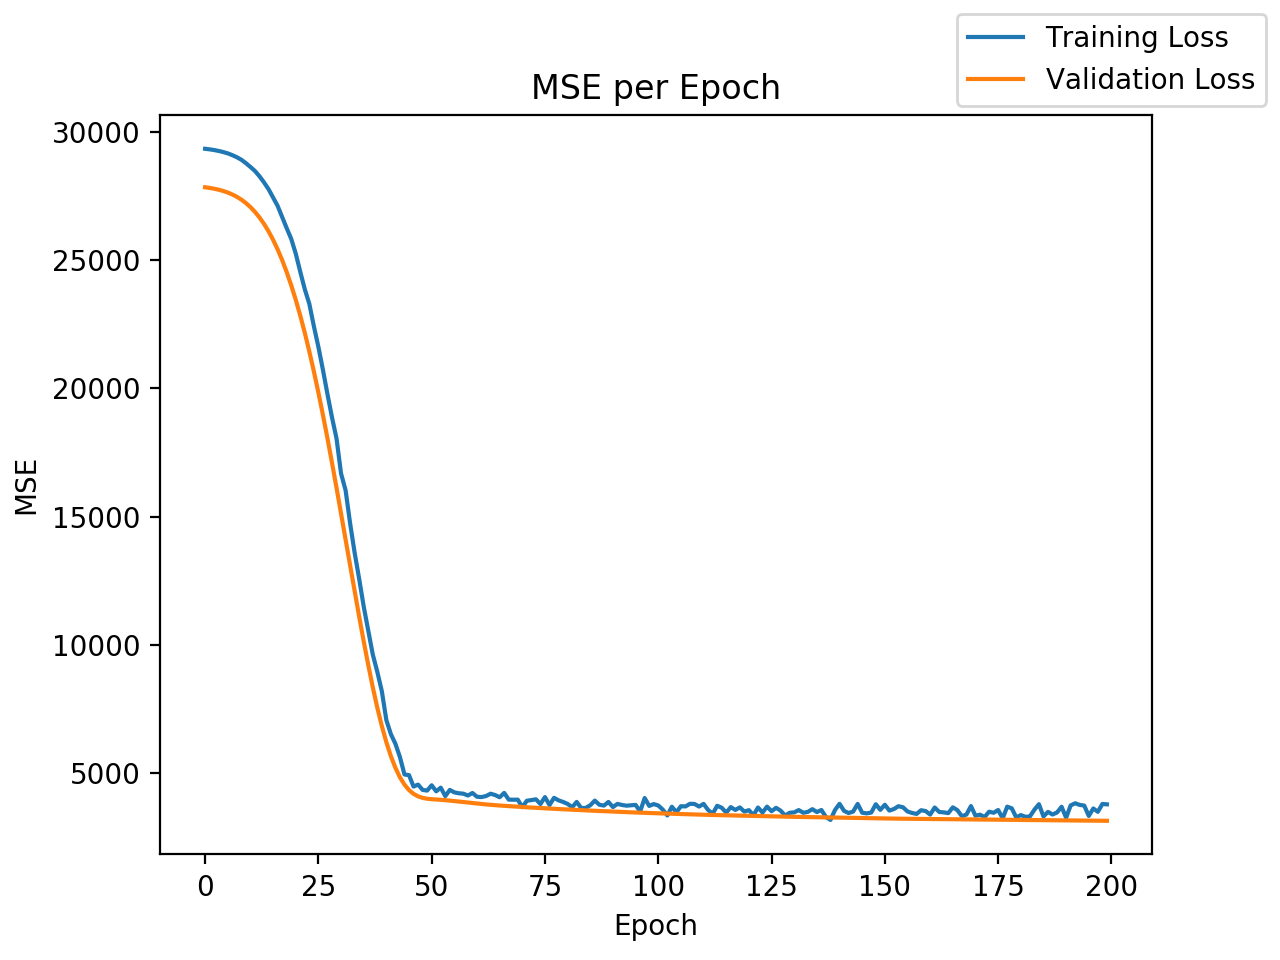

In [77]:
fig, ax = plt.subplots()
ax.set_title("MSE per Epoch")
ax.set_ylabel("MSE")
ax.set_xlabel("Epoch")
ax.plot(range(len(history.history['loss'])), history.history['loss'], label="Training Loss")
ax.plot(range(len(history.history['loss'])), history.history['val_loss'], label="Validation Loss")
fig.legend()

**Try your own combinations of hyperparameters to achieve the best validation loss.**

In [ ]:
model = create_network(INSERT_NETWORK_CONFIG)
history = model.fit(train_X, train_y, validation_data=(val_X, val_y),
          epochs=200,
          batch_size=128)

In [ ]:
fig, ax = plt.subplots()
ax.set_title("MSE per Epoch")
ax.set_ylabel("MSE")
ax.set_xlabel("Epoch")
ax.plot(range(len(history.history['loss'])), history.history['loss'], label="Training Loss")
ax.plot(range(len(history.history['loss'])), history.history['val_loss'], label="Validation Loss")
fig.legend()